Đọc dữ liệu từ file excel

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
# Đọc file Excel
df = pd.read_excel("SRD_data_cleaned.xlsx")

# Xem thông tin tổng quát
print(df.info())
print(df.describe(include='all'))

Saving SRD_data_cleaned.xlsx to SRD_data_cleaned (1).xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           4175 non-null   object 
 1   year              4175 non-null   int64  
 2   sdg1_wpc          4175 non-null   float64
 3   sdg1_lmicpov      4175 non-null   float64
 4   sdg2_undernsh     4175 non-null   float64
 5   sdg2_stunting     4175 non-null   float64
 6   sdg2_obesity      4175 non-null   float64
 7   sdg2_trophic      4175 non-null   float64
 8   sdg2_crlyld       4175 non-null   float64
 9   sdg2_snmi         4175 non-null   float64
 10  sdg3_matmort      4175 non-null   float64
 11  sdg3_neonat       4175 non-null   float64
 12  sdg3_u5mort       4175 non-null   float64
 13  sdg3_tb           4175 non-null   float64
 14  sdg3_hiv          4175 non-null   float64
 15  sdg3_ncds         4175 non-null

# Nhóm các kiểu dữ liệu

In [ ]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt

# Lấy danh sách tất cả các cột
columns = df.columns

# Dictionary lưu các nhóm theo SDG
sdg_groups = defaultdict(list)

# Tách và nhóm
for col in columns:
    match = re.match(r"sdg(\d+)_", col)
    if match:
        sdg_num = int(match.group(1))
        sdg_groups[sdg_num].append(col)

# In thống kê mô tả cho từng biến trong từng nhóm
for sdg_num, cols in sorted(sdg_groups.items()):
    print(f"Thống kê mô tả cho SDG {sdg_num}:")
    # In thống kê mô tả của từng cột trong nhóm
    for col in cols:
        print(f"\nThống kê mô tả cho cột '{col}':")
        print(df[col].describe())  # In thống kê mô tả của cột
    print("=" * 50)


Thống kê mô tả cho SDG 1:

Thống kê mô tả cho cột 'sdg1_wpc':
count    4175.000000
mean       13.913324
std        19.899452
min         0.003000
25%         0.678400
50%         2.514000
75%        21.831500
max        89.621000
Name: sdg1_wpc, dtype: float64

Thống kê mô tả cho cột 'sdg1_lmicpov':
count    4175.000000
mean       23.899523
std        27.528587
min         0.012000
25%         1.118000
50%        10.082000
75%        42.966500
max        99.572000
Name: sdg1_lmicpov, dtype: float64
Thống kê mô tả cho SDG 2:

Thống kê mô tả cho cột 'sdg2_undernsh':
count    4175.000000
mean       11.662457
std        11.422284
min         2.500000
25%         2.500000
50%         7.000000
75%        16.820000
max        70.900000
Name: sdg2_undernsh, dtype: float64

Thống kê mô tả cho cột 'sdg2_stunting':
count    4175.000000
mean       18.518275
std        13.143895
min         0.500000
25%         4.500000
50%        13.400000
75%        29.850000
max        64.000000
Name: sdg2_stunt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re

# Đọc dữ liệu
df = pd.read_excel("SRD_data_cleaned.xlsx")

# Lọc dữ liệu Việt Nam
df_vietnam = df[df['Country'] == 'Vietnam']

# Lọc dữ liệu 2023-2024
df_vietnam_recent = df_vietnam[df_vietnam['year'].isin([2023, 2024])]

# In dữ liệu Việt Nam
print("Dữ liệu Việt Nam 2023-2024:")
print(df_vietnam_recent[['year', 'SDG Index Score', 'sdg1_lmicpov', 'sdg7_renewcon', 'sdg11_pm25', 'sdg4_literacy']])

Dữ liệu Việt Nam 2023-2024:
      year  SDG Index Score  sdg1_lmicpov  sdg7_renewcon  sdg11_pm25  \
4073  2023         73.31995         2.438           3.68       22.06   
4074  2024         73.31995         1.978          15.90       25.60   

      sdg4_literacy  
4073          93.09  
4074          99.05  


# Biểu đồ thể hiện từng cột (x là giá trị , y là số lượng xuất hiện)

Vẽ histogram cho SDG 1


Vẽ histogram cho SDG 2


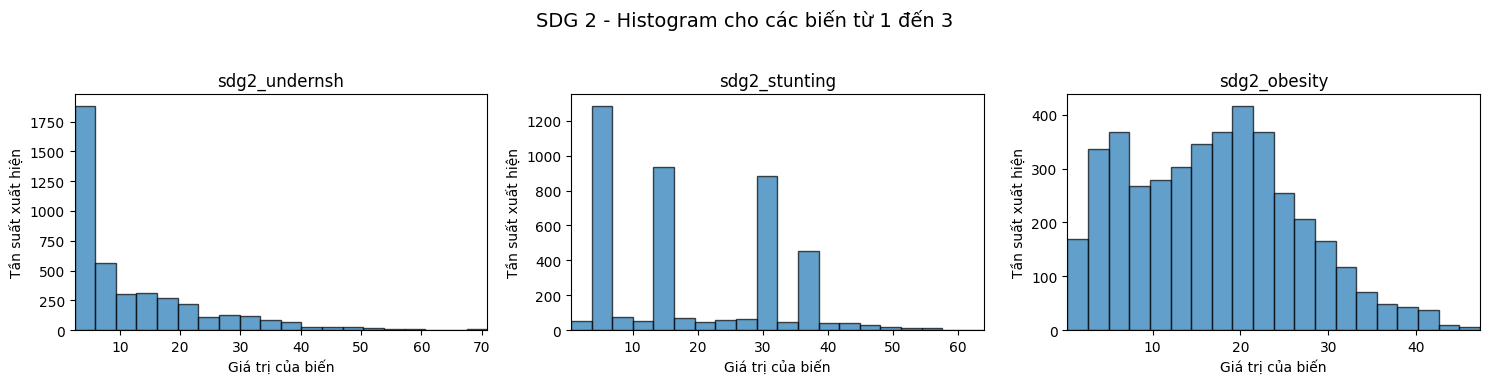

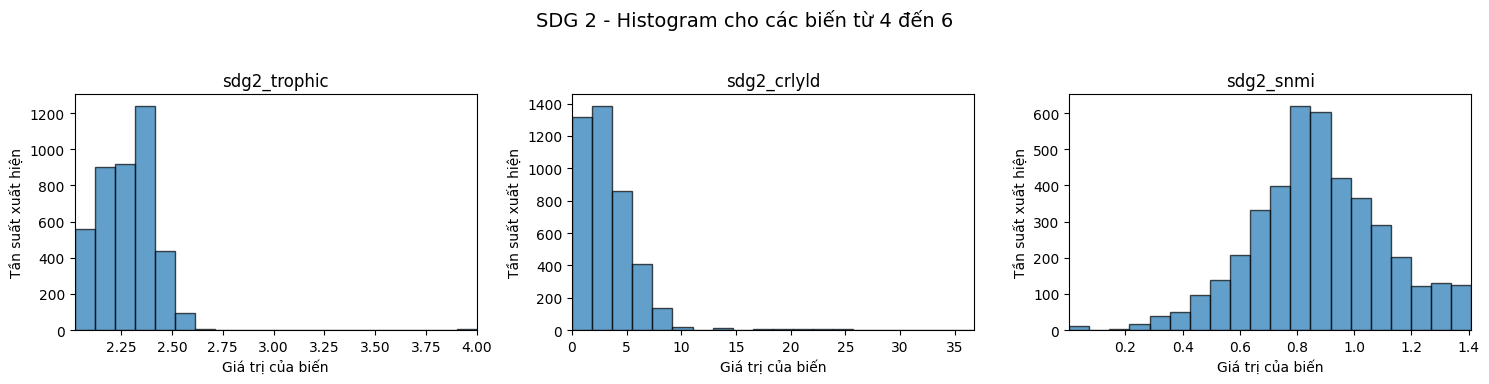

Vẽ histogram cho SDG 3


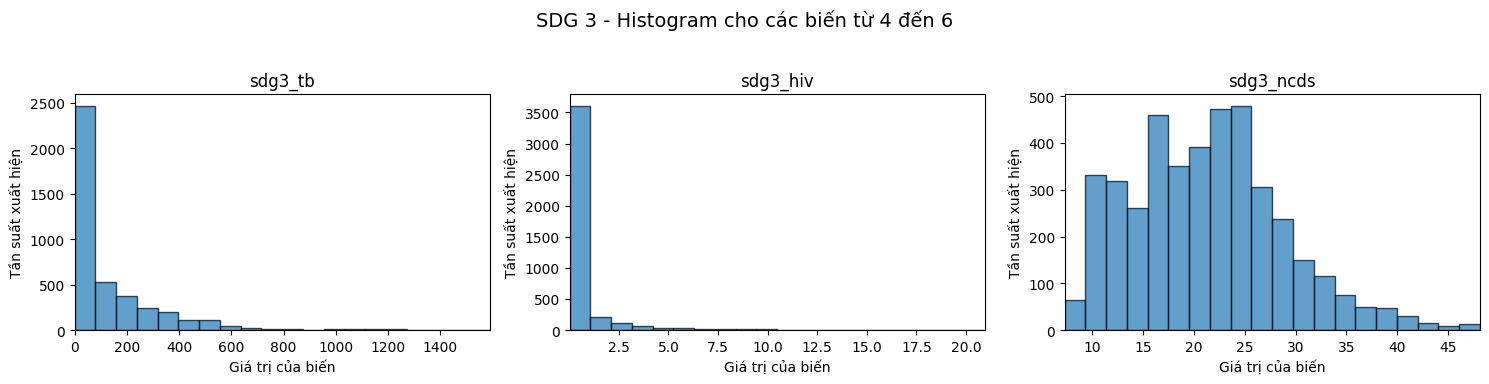

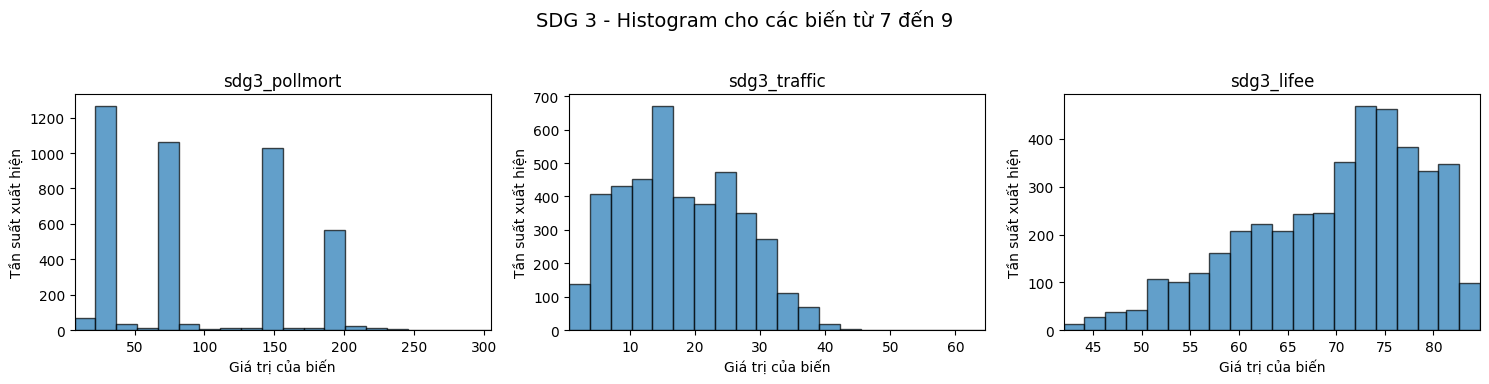

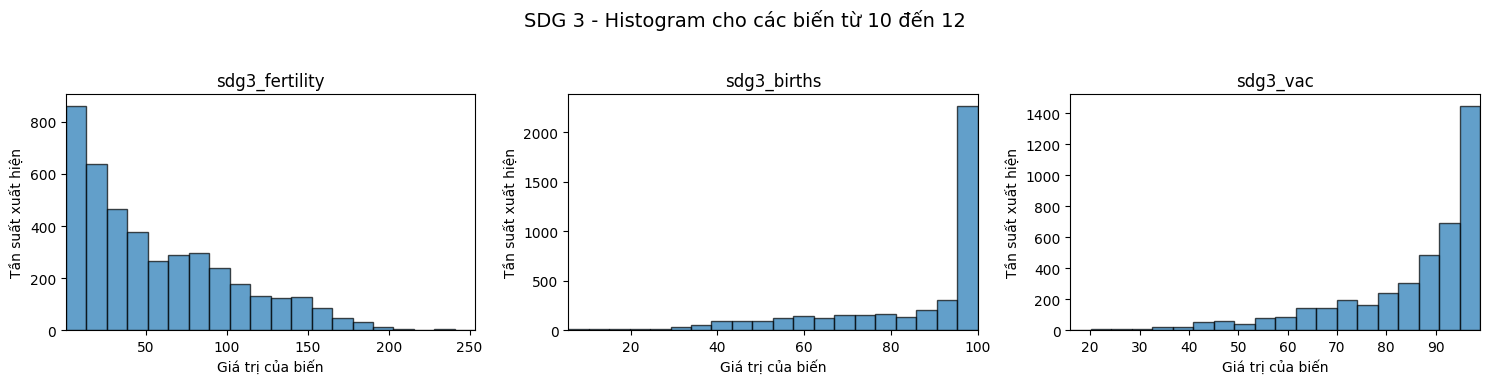

Vẽ histogram cho SDG 4


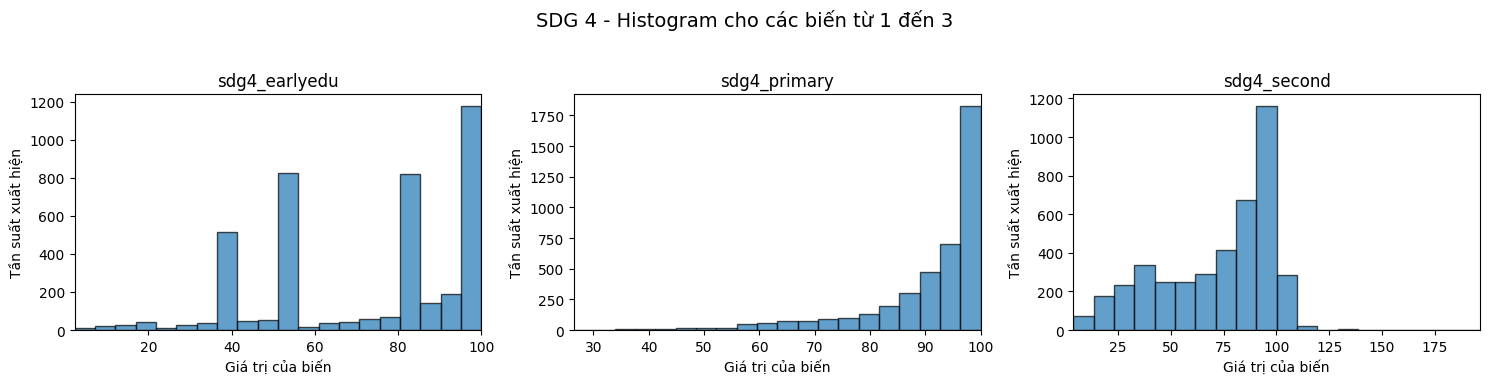

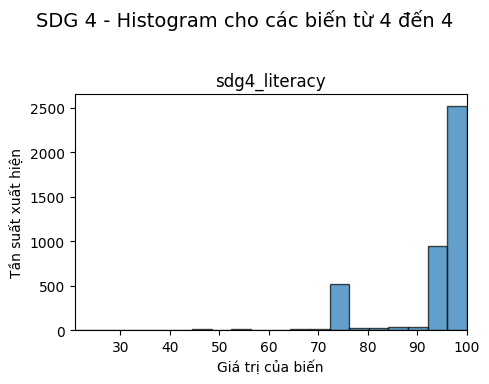

Vẽ histogram cho SDG 5


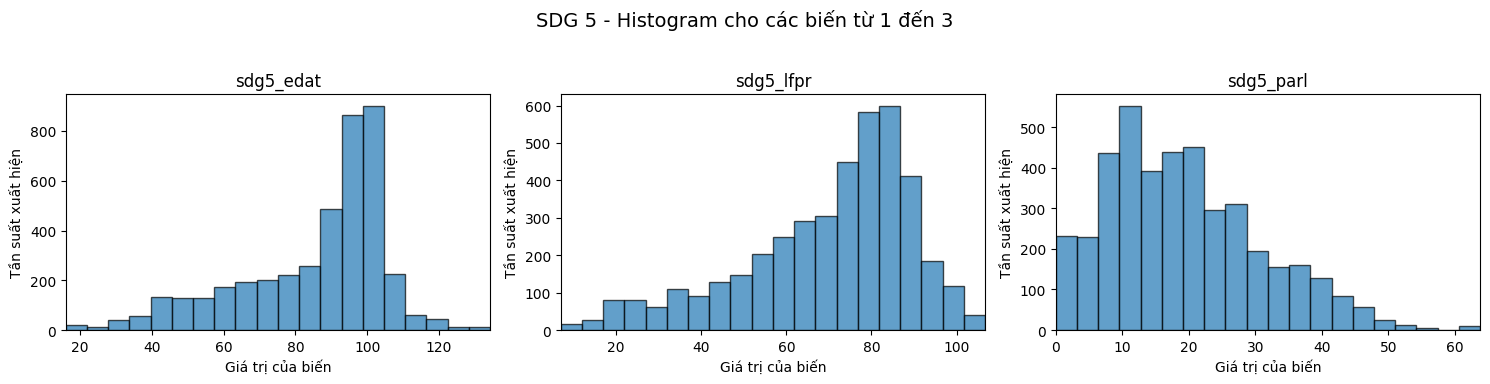

Vẽ histogram cho SDG 6


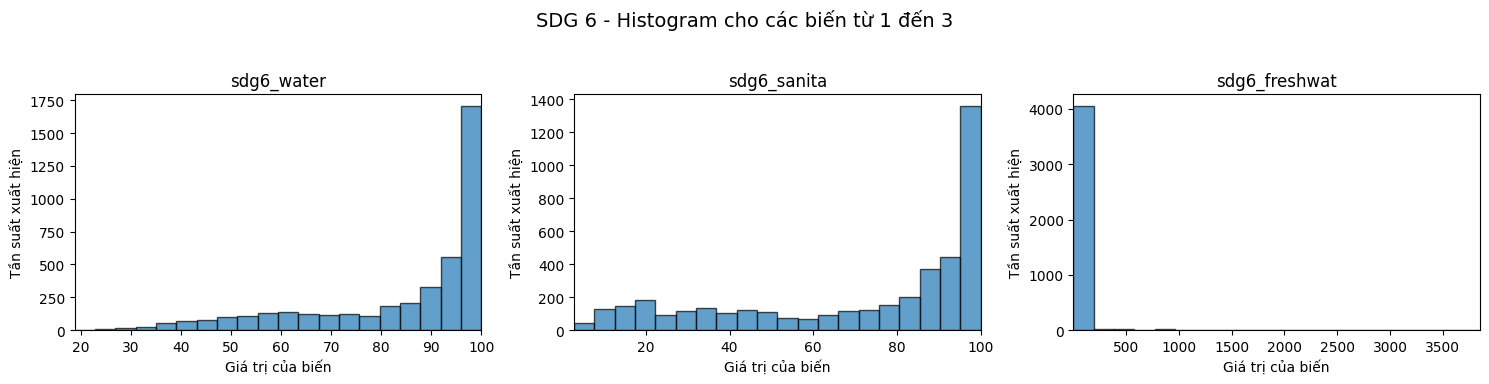

Vẽ histogram cho SDG 7


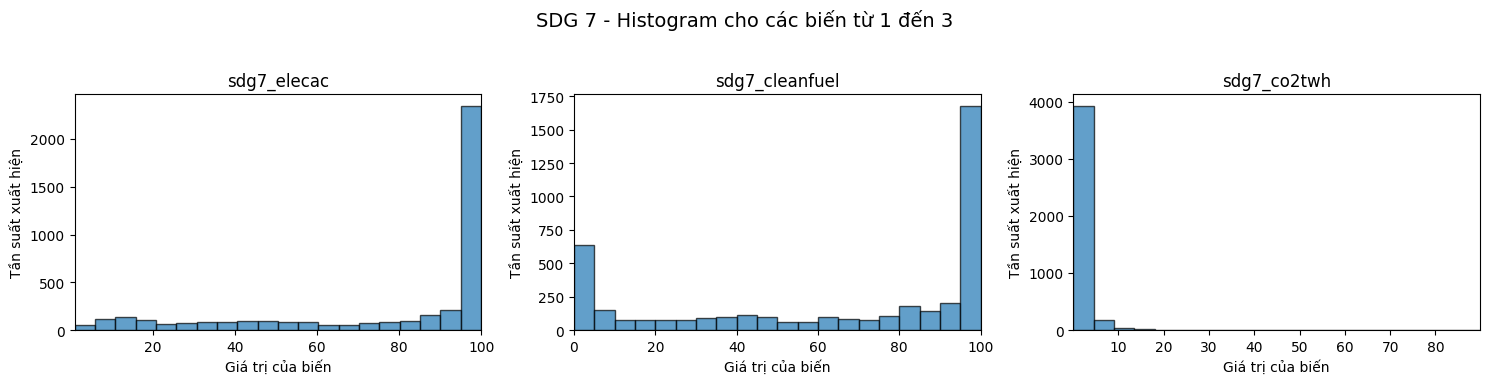

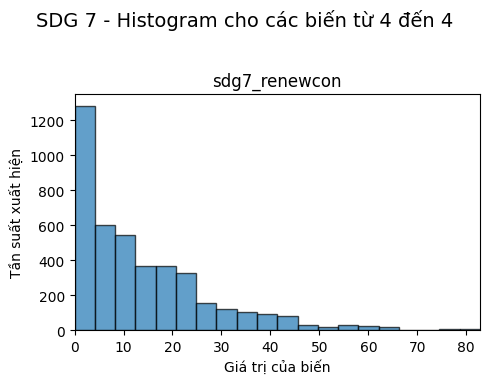

Vẽ histogram cho SDG 8


Vẽ histogram cho SDG 9


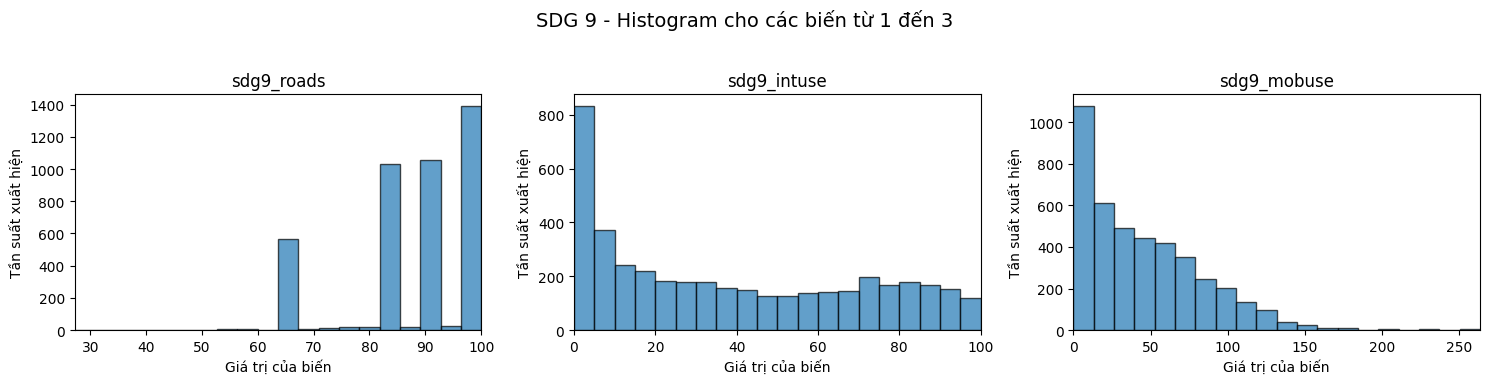

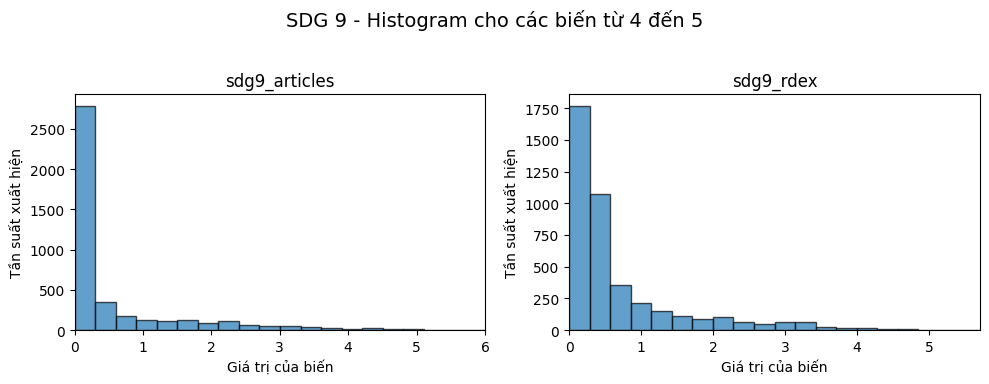

Vẽ histogram cho SDG 11


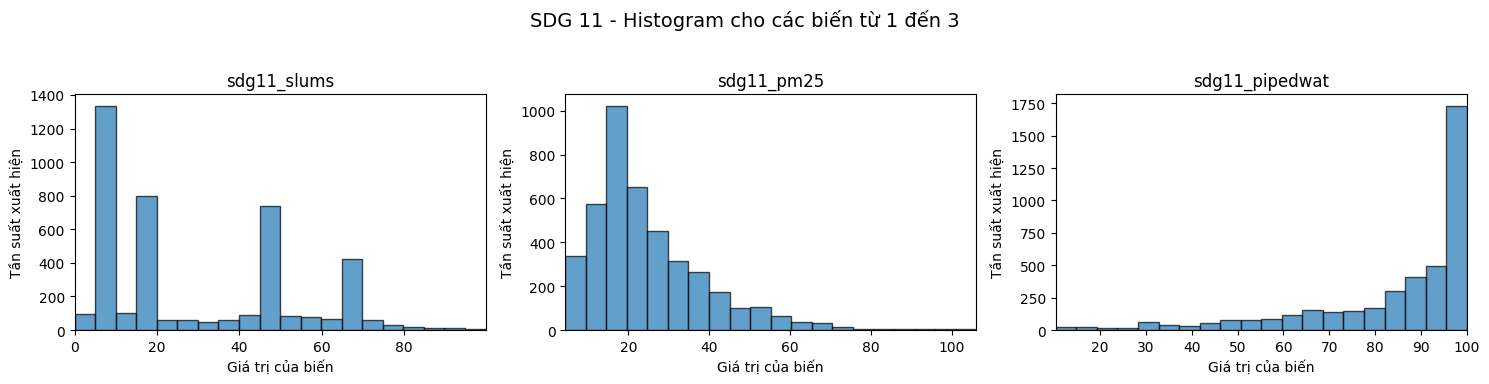

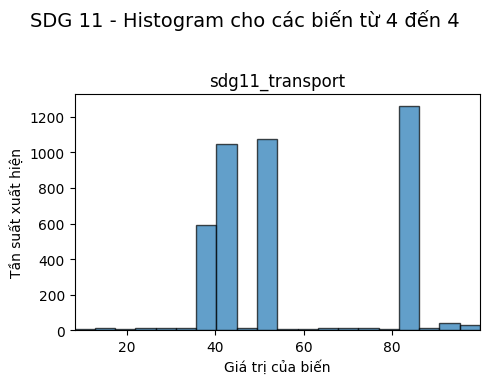

Vẽ histogram cho SDG 12


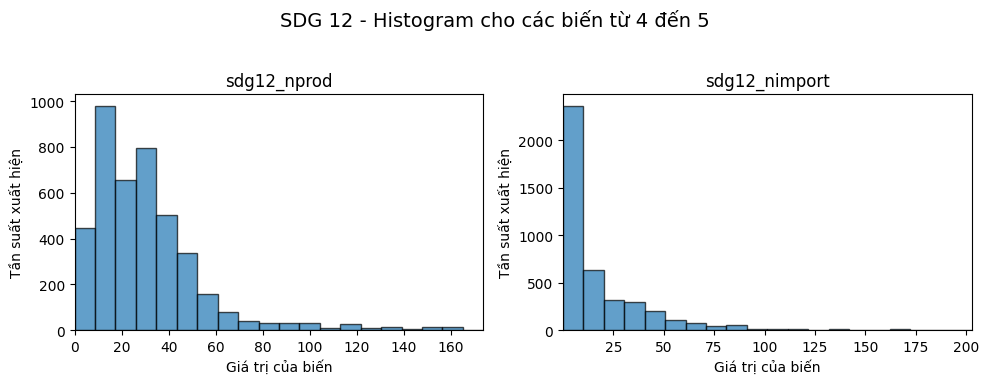

Vẽ histogram cho SDG 13


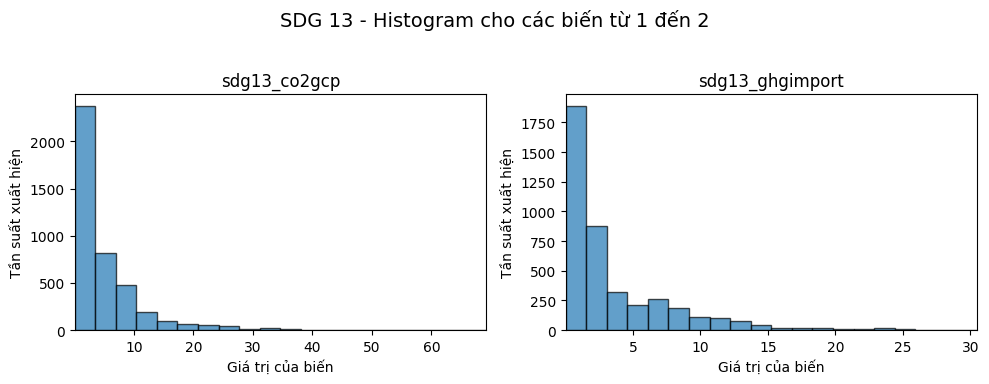

Vẽ histogram cho SDG 14


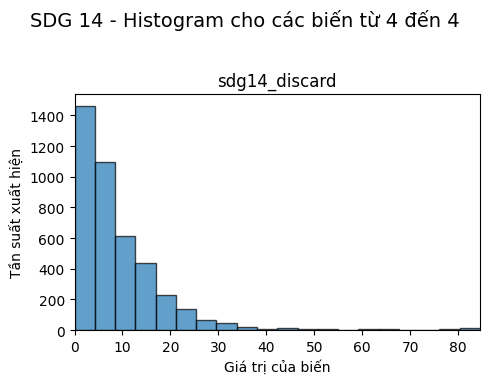

Vẽ histogram cho SDG 15


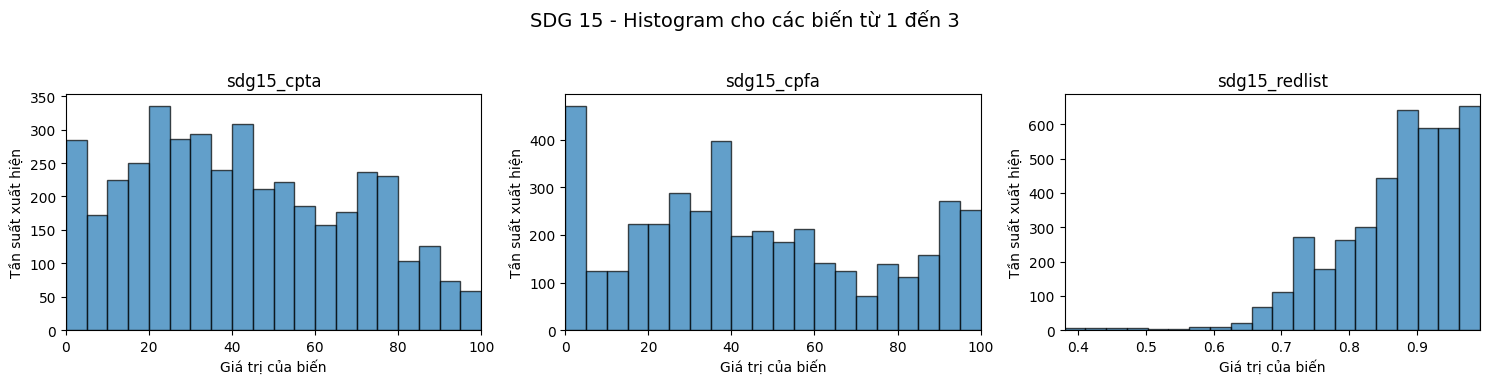

Vẽ histogram cho SDG 16


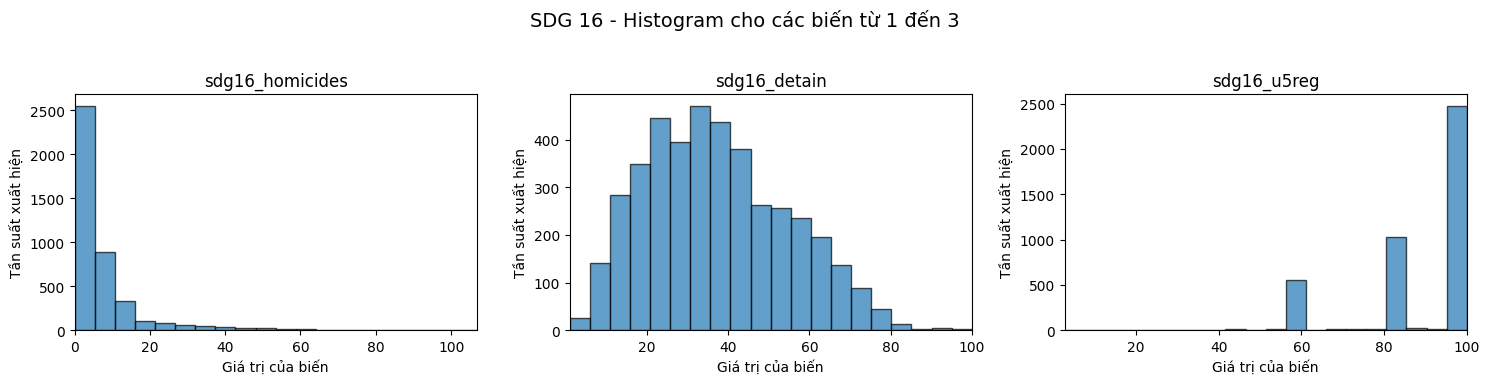

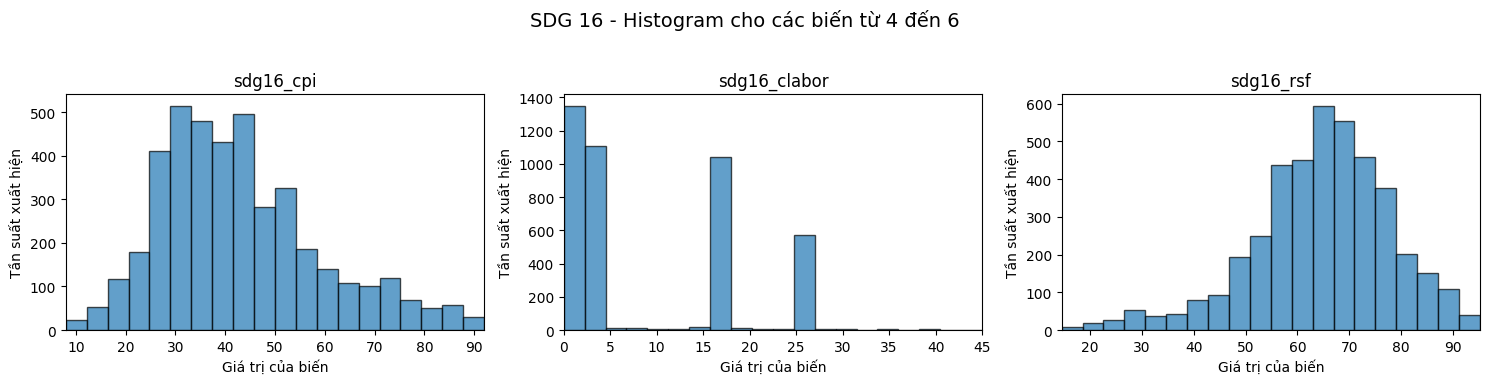

Vẽ histogram cho SDG 17


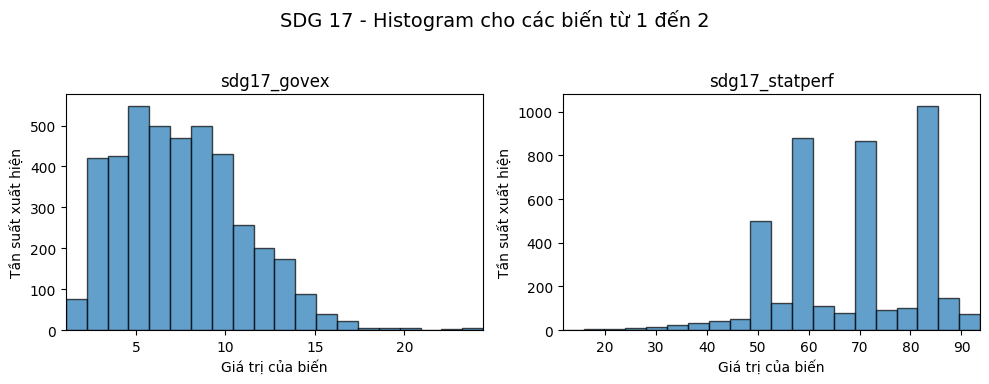

In [ ]:
def plot_histograms_by_sdg(df, sdg_groups, batch_size=3, bins=20):
    for sdg_num, cols in sorted(sdg_groups.items()):
        print(f"Vẽ histogram cho SDG {sdg_num}")
        for i in range(0, len(cols), batch_size):
            batch = cols[i:i+batch_size]
            num_plots = len(batch)

            fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(5 * num_plots, 4))

            if num_plots == 1:
                axes = [axes]

            for ax, col in zip(axes, batch):
                # Sử dụng nhiều bins hơn và giới hạn phạm vi
                df[col].plot(kind='hist', bins=bins, ax=ax, alpha=0.7, edgecolor='black',
                            range=(df[col].min(), df[col].max()))
                ax.set_title(f"{col}")
                ax.set_xlim([df[col].min(), df[col].max()])  # Giới hạn trục x theo phạm vi dữ liệu
                ax.set_xlabel("Giá trị của biến")
                ax.set_ylabel("Tần suất xuất hiện")

            plt.suptitle(f"SDG {sdg_num} - Histogram cho các biến từ {i+1} đến {i+len(batch)}", fontsize=14)
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()

# Gọi hàm
plot_histograms_by_sdg(df, sdg_groups)


# Xử lí các giá trị ngoại lai

In [ ]:
def detect_outliers_iqr(df, group_cols, num_outliers=10):
    outliers_info = {}
    total_outliers = 0  # Biến đếm tổng số ngoại lai

    for sdg, cols in group_cols.items():
        print(f"\n🔍 Kiểm tra SDG {sdg}")
        for col in cols:
            # Bỏ qua nếu cột không tồn tại trong DataFrame
            if col not in df.columns:
                print(f"Cột {col} không tồn tại trong DataFrame")
                continue

            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
            num_outliers_found = len(outliers)
            total_outliers += num_outliers_found

            if not outliers.empty:
                print(f"\n Biến: {col}")
                print(f" - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
                print(f" - Ngưỡng: [{lower_bound:.2f}, {upper_bound:.2f}]")
                print(f" - Tổng số ngoại lai: {num_outliers_found}")

                # Lấy 10 giá trị ngoại lai đầu tiên
                top_outliers = outliers.head(num_outliers)
                print(f" - {num_outliers} giá trị ngoại lai đầu tiên:")
                print(top_outliers.values)

                outliers_info[col] = top_outliers
            else:
                print(f"✔️ {col}: Không có ngoại lai")

    print(f"\n📊 Tổng số ngoại lai phát hiện được: {total_outliers}")
    return outliers_info

In [ ]:
outliers_dict = detect_outliers_iqr(df, sdg_groups)


🔍 Kiểm tra SDG 1

 Biến: sdg1_wpc
 - Q1: 0.68, Q3: 21.83, IQR: 21.15
 - Ngưỡng: [-31.05, 53.56]
 - Tổng số ngoại lai: 289
 - 10 giá trị ngoại lai đầu tiên:
[61.704 60.977 60.256 57.456 58.409 54.004 56.769 65.156 84.862 85.417]
✔️ sdg1_lmicpov: Không có ngoại lai

🔍 Kiểm tra SDG 2

 Biến: sdg2_undernsh
 - Q1: 2.50, Q3: 16.82, IQR: 14.32
 - Ngưỡng: [-18.98, 38.30]
 - Tổng số ngoại lai: 142
 - 10 giá trị ngoại lai đầu tiên:
[46.4 44.1 39.  67.8 63.5 59.1 55.4 52.6 49.8 46.7]
✔️ sdg2_stunting: Không có ngoại lai

 Biến: sdg2_obesity
 - Q1: 8.74, Q3: 23.05, IQR: 14.31
 - Ngưỡng: [-12.72, 44.50]
 - Tổng số ngoại lai: 5
 - 10 giá trị ngoại lai đầu tiên:
[45.05 45.78 46.52 47.26 47.26]

 Biến: sdg2_trophic
 - Q1: 2.17, Q3: 2.38, IQR: 0.21
 - Ngưỡng: [1.86, 2.69]
 - Tổng số ngoại lai: 11
 - 10 giá trị ngoại lai đầu tiên:
[2.909  2.9498 4.     4.     3.99   3.996  3.993  3.992  3.6594 2.9008]

 Biến: sdg2_crlyld
 - Q1: 1.56, Q3: 4.39, IQR: 2.83
 - Ngưỡng: [-2.68, 8.63]
 - Tổng số ngoại lai: 90

# Tính heat map

Phân tích mối quan hệ giữa các biến
1.	Nhóm biến theo SDG (bạn đã có sdg_groups).
3.	Scale bằng RobustScaler.
4.	Tính và trực quan hóa ma trận tương quan cho từng nhóm SDG.
5.	Mở rộng: kiểm tra Granger causality giữa hai chỉ số bất kỳ.

In [ ]:
import re
from collections import defaultdict

# Lấy danh sách tất cả các cột
columns = df.columns

# Dictionary lưu các nhóm theo SDG
sdg_groups = defaultdict(list)

# Tách và nhóm
for col in columns:
    match = re.match(r"sdg(\d+)_", col)
    if match:
        sdg_num = int(match.group(1))
        sdg_groups[sdg_num].append(col)

# In thống kê mô tả cho từng biến trong từng nhóm
for sdg_num, cols in sorted(sdg_groups.items()):
    print(f"Thống kê mô tả cho SDG {sdg_num}:")
    # In thống kê mô tả của từng cột trong nhóm
    for col in cols:
        print(f"\nThống kê mô tả cho cột '{col}':")
        print(df[col].describe())  # In thống kê mô tả của cột
    print("=" * 50)


Thống kê mô tả cho SDG 1:

Thống kê mô tả cho cột 'sdg1_wpc':
count    4175.000000
mean       13.913324
std        19.899452
min         0.003000
25%         0.678400
50%         2.514000
75%        21.831500
max        89.621000
Name: sdg1_wpc, dtype: float64

Thống kê mô tả cho cột 'sdg1_lmicpov':
count    4175.000000
mean       23.899523
std        27.528587
min         0.012000
25%         1.118000
50%        10.082000
75%        42.966500
max        99.572000
Name: sdg1_lmicpov, dtype: float64
Thống kê mô tả cho SDG 2:

Thống kê mô tả cho cột 'sdg2_undernsh':
count    4175.000000
mean       11.662457
std        11.422284
min         2.500000
25%         2.500000
50%         7.000000
75%        16.820000
max        70.900000
Name: sdg2_undernsh, dtype: float64

Thống kê mô tả cho cột 'sdg2_stunting':
count    4175.000000
mean       18.518275
std        13.143895
min         0.500000
25%         4.500000
50%        13.400000
75%        29.850000
max        64.000000
Name: sdg2_stunt

In [ ]:
from sklearn.preprocessing import RobustScaler

# Lưu lại các cột không scale
non_numeric_cols = ["Country", "year"]

# Lấy các cột số
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.difference(non_numeric_cols)

scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])


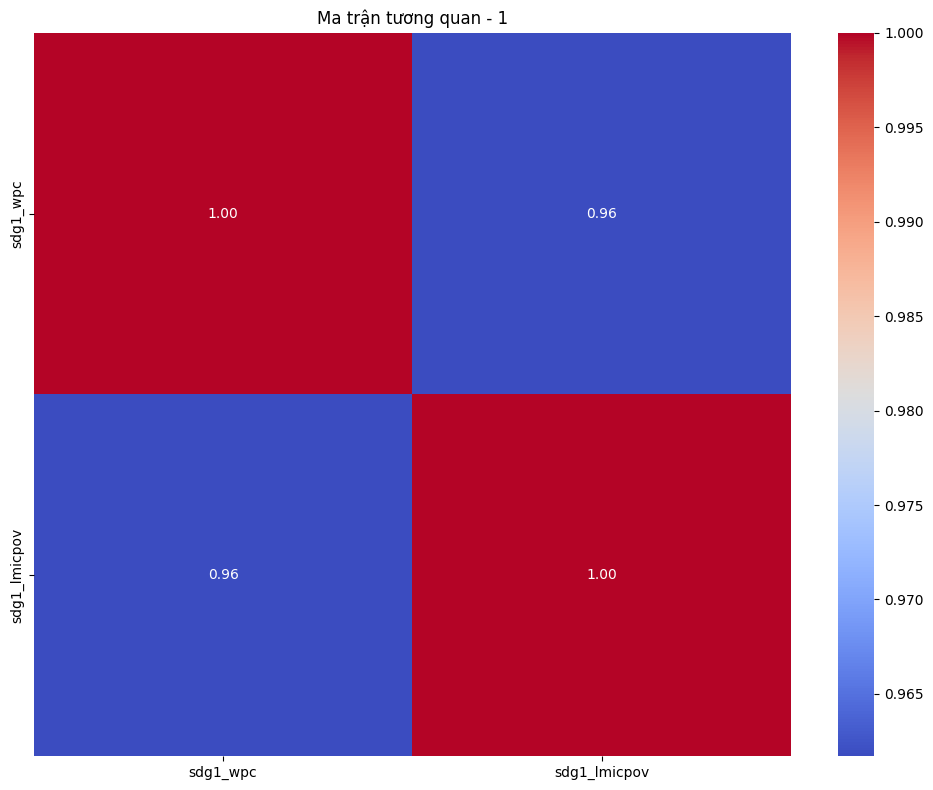


Đánh giá mối quan hệ trong nhóm 1:
sdg1_wpc và sdg1_lmicpov: Mối quan hệ mạnh
sdg1_lmicpov và sdg1_wpc: Mối quan hệ mạnh


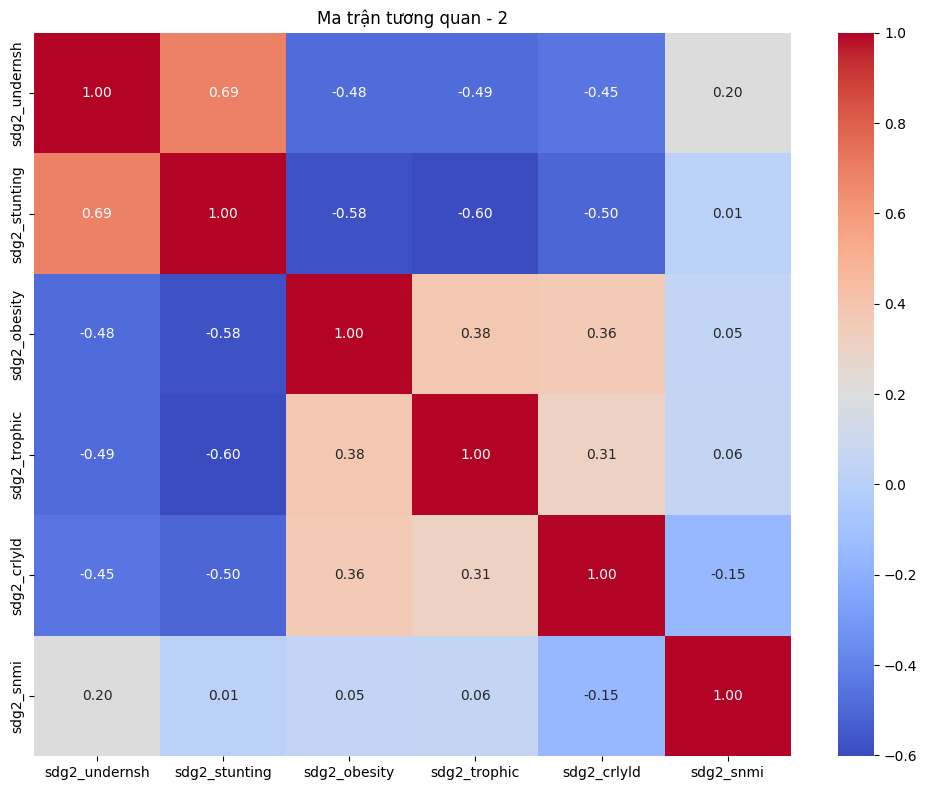


Đánh giá mối quan hệ trong nhóm 2:
sdg2_undernsh và sdg2_stunting: Mối quan hệ trung bình
sdg2_undernsh và sdg2_obesity: Mối quan hệ trung bình
sdg2_undernsh và sdg2_trophic: Mối quan hệ trung bình
sdg2_undernsh và sdg2_crlyld: Mối quan hệ trung bình
sdg2_undernsh và sdg2_snmi: Mối quan hệ yếu
sdg2_stunting và sdg2_undernsh: Mối quan hệ trung bình
sdg2_stunting và sdg2_obesity: Mối quan hệ trung bình
sdg2_stunting và sdg2_trophic: Mối quan hệ trung bình
sdg2_stunting và sdg2_crlyld: Mối quan hệ trung bình
sdg2_stunting và sdg2_snmi: Mối quan hệ yếu
sdg2_obesity và sdg2_undernsh: Mối quan hệ trung bình
sdg2_obesity và sdg2_stunting: Mối quan hệ trung bình
sdg2_obesity và sdg2_trophic: Mối quan hệ trung bình
sdg2_obesity và sdg2_crlyld: Mối quan hệ trung bình
sdg2_obesity và sdg2_snmi: Mối quan hệ yếu
sdg2_trophic và sdg2_undernsh: Mối quan hệ trung bình
sdg2_trophic và sdg2_stunting: Mối quan hệ trung bình
sdg2_trophic và sdg2_obesity: Mối quan hệ trung bình
sdg2_trophic và sdg2_crlyld

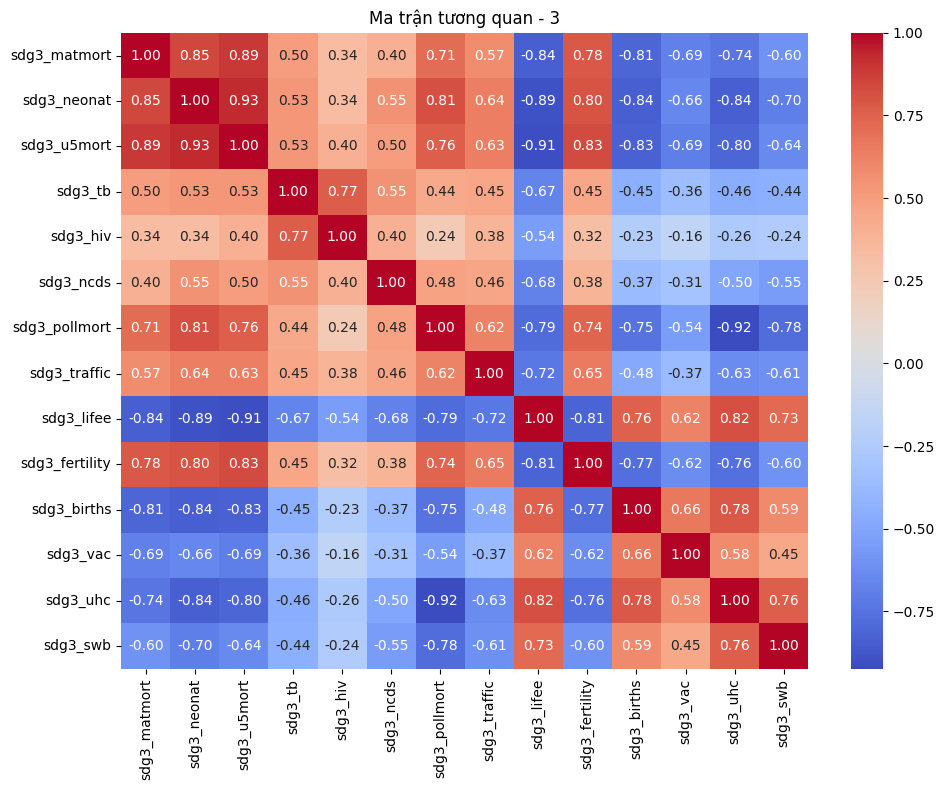


Đánh giá mối quan hệ trong nhóm 3:
sdg3_matmort và sdg3_neonat: Mối quan hệ mạnh
sdg3_matmort và sdg3_u5mort: Mối quan hệ mạnh
sdg3_matmort và sdg3_tb: Mối quan hệ trung bình
sdg3_matmort và sdg3_hiv: Mối quan hệ trung bình
sdg3_matmort và sdg3_ncds: Mối quan hệ trung bình
sdg3_matmort và sdg3_pollmort: Mối quan hệ mạnh
sdg3_matmort và sdg3_traffic: Mối quan hệ trung bình
sdg3_matmort và sdg3_lifee: Mối quan hệ mạnh
sdg3_matmort và sdg3_fertility: Mối quan hệ mạnh
sdg3_matmort và sdg3_births: Mối quan hệ mạnh
sdg3_matmort và sdg3_vac: Mối quan hệ trung bình
sdg3_matmort và sdg3_uhc: Mối quan hệ mạnh
sdg3_matmort và sdg3_swb: Mối quan hệ trung bình
sdg3_neonat và sdg3_matmort: Mối quan hệ mạnh
sdg3_neonat và sdg3_u5mort: Mối quan hệ mạnh
sdg3_neonat và sdg3_tb: Mối quan hệ trung bình
sdg3_neonat và sdg3_hiv: Mối quan hệ trung bình
sdg3_neonat và sdg3_ncds: Mối quan hệ trung bình
sdg3_neonat và sdg3_pollmort: Mối quan hệ mạnh
sdg3_neonat và sdg3_traffic: Mối quan hệ trung bình
sdg3_neon

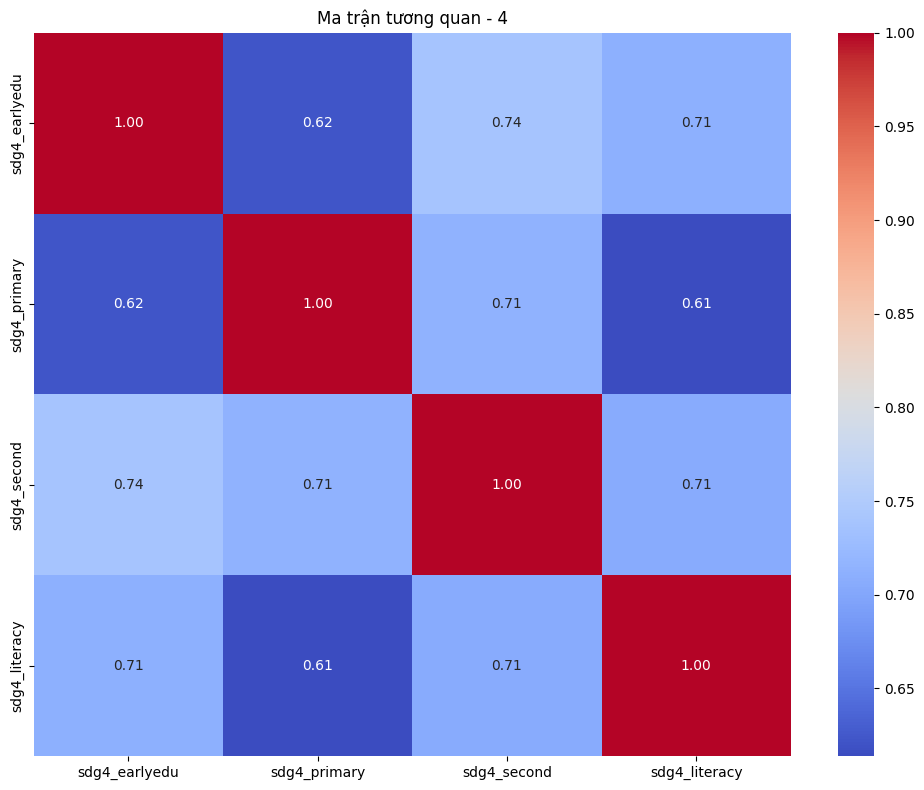


Đánh giá mối quan hệ trong nhóm 4:
sdg4_earlyedu và sdg4_primary: Mối quan hệ trung bình
sdg4_earlyedu và sdg4_second: Mối quan hệ mạnh
sdg4_earlyedu và sdg4_literacy: Mối quan hệ mạnh
sdg4_primary và sdg4_earlyedu: Mối quan hệ trung bình
sdg4_primary và sdg4_second: Mối quan hệ mạnh
sdg4_primary và sdg4_literacy: Mối quan hệ trung bình
sdg4_second và sdg4_earlyedu: Mối quan hệ mạnh
sdg4_second và sdg4_primary: Mối quan hệ mạnh
sdg4_second và sdg4_literacy: Mối quan hệ mạnh
sdg4_literacy và sdg4_earlyedu: Mối quan hệ mạnh
sdg4_literacy và sdg4_primary: Mối quan hệ trung bình
sdg4_literacy và sdg4_second: Mối quan hệ mạnh


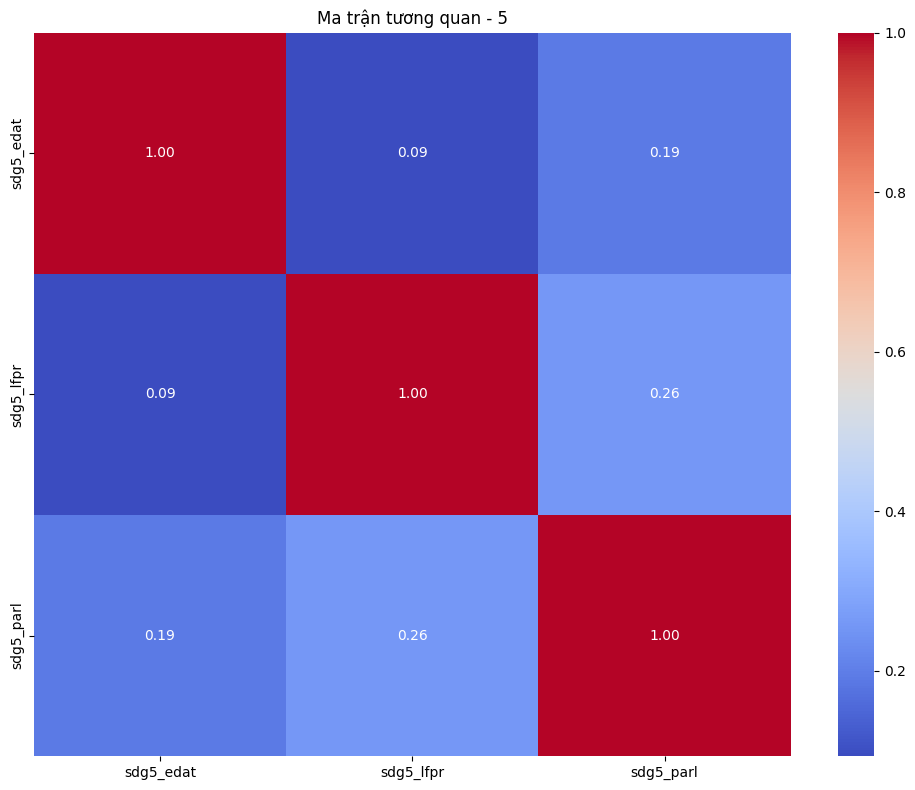


Đánh giá mối quan hệ trong nhóm 5:
sdg5_edat và sdg5_lfpr: Mối quan hệ yếu
sdg5_edat và sdg5_parl: Mối quan hệ yếu
sdg5_lfpr và sdg5_edat: Mối quan hệ yếu
sdg5_lfpr và sdg5_parl: Mối quan hệ yếu
sdg5_parl và sdg5_edat: Mối quan hệ yếu
sdg5_parl và sdg5_lfpr: Mối quan hệ yếu


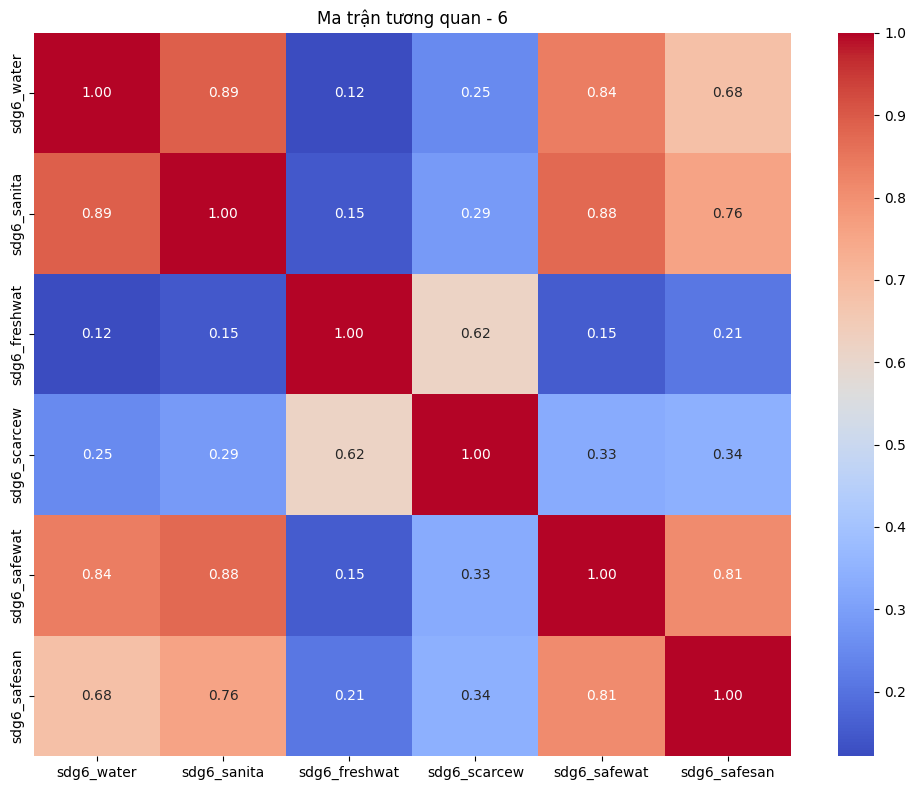


Đánh giá mối quan hệ trong nhóm 6:
sdg6_water và sdg6_sanita: Mối quan hệ mạnh
sdg6_water và sdg6_freshwat: Mối quan hệ yếu
sdg6_water và sdg6_scarcew: Mối quan hệ yếu
sdg6_water và sdg6_safewat: Mối quan hệ mạnh
sdg6_water và sdg6_safesan: Mối quan hệ trung bình
sdg6_sanita và sdg6_water: Mối quan hệ mạnh
sdg6_sanita và sdg6_freshwat: Mối quan hệ yếu
sdg6_sanita và sdg6_scarcew: Mối quan hệ yếu
sdg6_sanita và sdg6_safewat: Mối quan hệ mạnh
sdg6_sanita và sdg6_safesan: Mối quan hệ mạnh
sdg6_freshwat và sdg6_water: Mối quan hệ yếu
sdg6_freshwat và sdg6_sanita: Mối quan hệ yếu
sdg6_freshwat và sdg6_scarcew: Mối quan hệ trung bình
sdg6_freshwat và sdg6_safewat: Mối quan hệ yếu
sdg6_freshwat và sdg6_safesan: Mối quan hệ yếu
sdg6_scarcew và sdg6_water: Mối quan hệ yếu
sdg6_scarcew và sdg6_sanita: Mối quan hệ yếu
sdg6_scarcew và sdg6_freshwat: Mối quan hệ trung bình
sdg6_scarcew và sdg6_safewat: Mối quan hệ trung bình
sdg6_scarcew và sdg6_safesan: Mối quan hệ trung bình
sdg6_safewat và sdg6


Đánh giá mối quan hệ trong nhóm 7:
sdg7_elecac và sdg7_cleanfuel: Mối quan hệ mạnh
sdg7_elecac và sdg7_co2twh: Mối quan hệ yếu
sdg7_elecac và sdg7_renewcon: Mối quan hệ yếu
sdg7_cleanfuel và sdg7_elecac: Mối quan hệ mạnh
sdg7_cleanfuel và sdg7_co2twh: Mối quan hệ yếu
sdg7_cleanfuel và sdg7_renewcon: Mối quan hệ yếu
sdg7_co2twh và sdg7_elecac: Mối quan hệ yếu
sdg7_co2twh và sdg7_cleanfuel: Mối quan hệ yếu
sdg7_co2twh và sdg7_renewcon: Mối quan hệ yếu
sdg7_renewcon và sdg7_elecac: Mối quan hệ yếu
sdg7_renewcon và sdg7_cleanfuel: Mối quan hệ yếu
sdg7_renewcon và sdg7_co2twh: Mối quan hệ yếu



Đánh giá mối quan hệ trong nhóm 8:
sdg8_accounts và sdg8_unemp: Mối quan hệ yếu
sdg8_accounts và sdg8_impacc: Mối quan hệ mạnh
sdg8_unemp và sdg8_accounts: Mối quan hệ yếu
sdg8_unemp và sdg8_impacc: Mối quan hệ yếu
sdg8_impacc và sdg8_accounts: Mối quan hệ mạnh
sdg8_impacc và sdg8_unemp: Mối quan hệ yếu


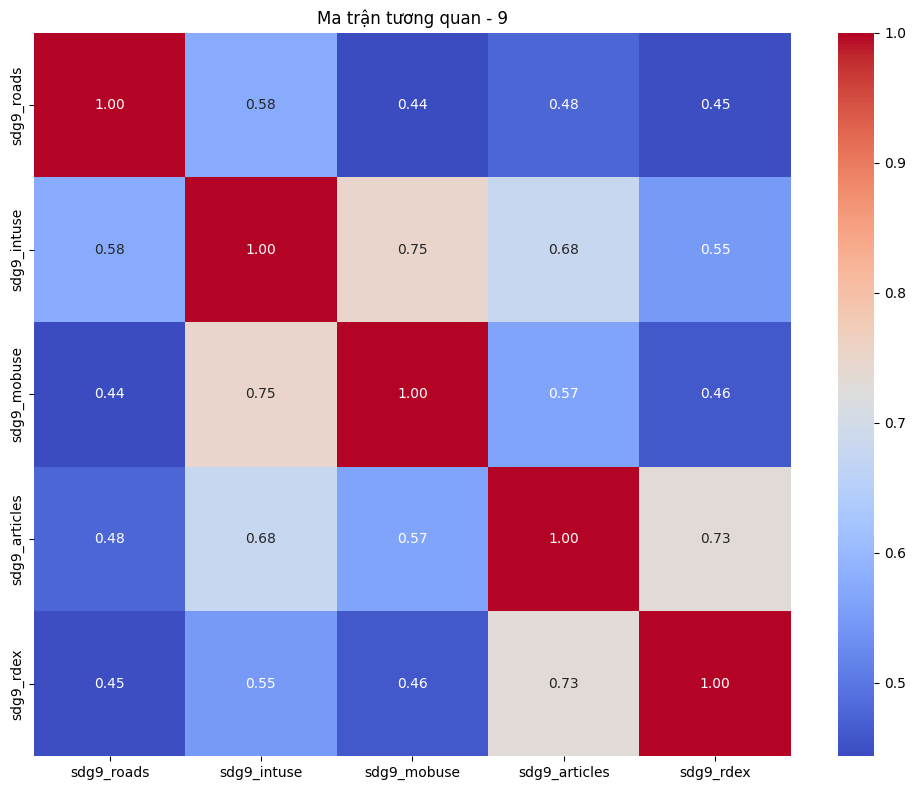


Đánh giá mối quan hệ trong nhóm 9:
sdg9_roads và sdg9_intuse: Mối quan hệ trung bình
sdg9_roads và sdg9_mobuse: Mối quan hệ trung bình
sdg9_roads và sdg9_articles: Mối quan hệ trung bình
sdg9_roads và sdg9_rdex: Mối quan hệ trung bình
sdg9_intuse và sdg9_roads: Mối quan hệ trung bình
sdg9_intuse và sdg9_mobuse: Mối quan hệ mạnh
sdg9_intuse và sdg9_articles: Mối quan hệ trung bình
sdg9_intuse và sdg9_rdex: Mối quan hệ trung bình
sdg9_mobuse và sdg9_roads: Mối quan hệ trung bình
sdg9_mobuse và sdg9_intuse: Mối quan hệ mạnh
sdg9_mobuse và sdg9_articles: Mối quan hệ trung bình
sdg9_mobuse và sdg9_rdex: Mối quan hệ trung bình
sdg9_articles và sdg9_roads: Mối quan hệ trung bình
sdg9_articles và sdg9_intuse: Mối quan hệ trung bình
sdg9_articles và sdg9_mobuse: Mối quan hệ trung bình
sdg9_articles và sdg9_rdex: Mối quan hệ mạnh
sdg9_rdex và sdg9_roads: Mối quan hệ trung bình
sdg9_rdex và sdg9_intuse: Mối quan hệ trung bình
sdg9_rdex và sdg9_mobuse: Mối quan hệ trung bình
sdg9_rdex và sdg9_art

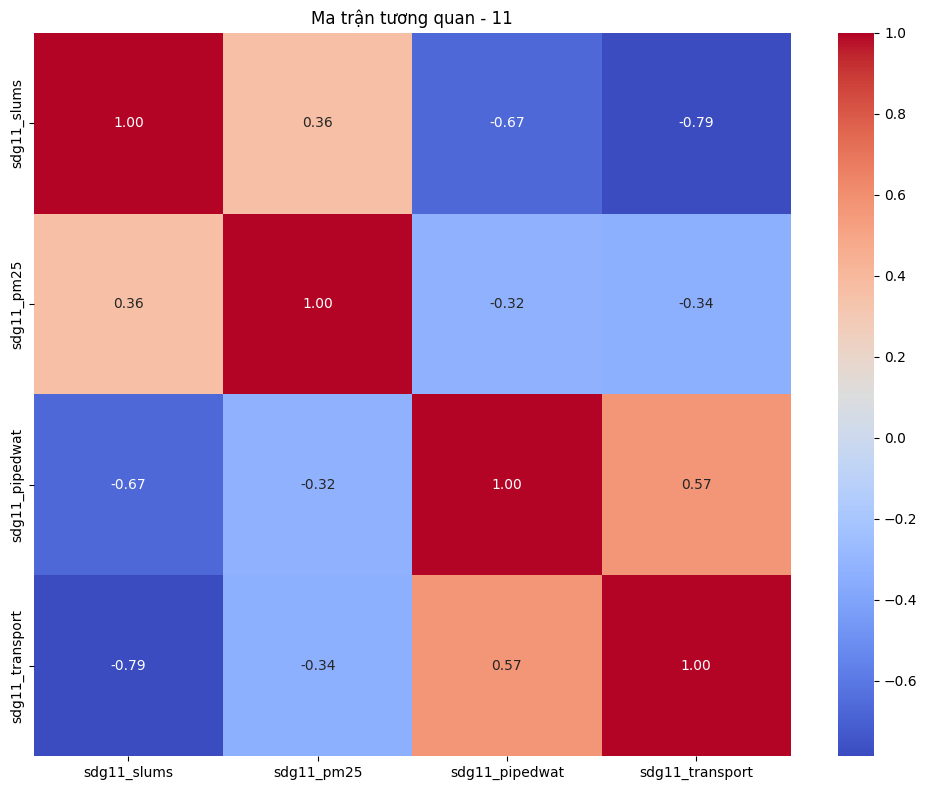


Đánh giá mối quan hệ trong nhóm 11:
sdg11_slums và sdg11_pm25: Mối quan hệ trung bình
sdg11_slums và sdg11_pipedwat: Mối quan hệ trung bình
sdg11_slums và sdg11_transport: Mối quan hệ mạnh
sdg11_pm25 và sdg11_slums: Mối quan hệ trung bình
sdg11_pm25 và sdg11_pipedwat: Mối quan hệ trung bình
sdg11_pm25 và sdg11_transport: Mối quan hệ trung bình
sdg11_pipedwat và sdg11_slums: Mối quan hệ trung bình
sdg11_pipedwat và sdg11_pm25: Mối quan hệ trung bình
sdg11_pipedwat và sdg11_transport: Mối quan hệ trung bình
sdg11_transport và sdg11_slums: Mối quan hệ mạnh
sdg11_transport và sdg11_pm25: Mối quan hệ trung bình
sdg11_transport và sdg11_pipedwat: Mối quan hệ trung bình


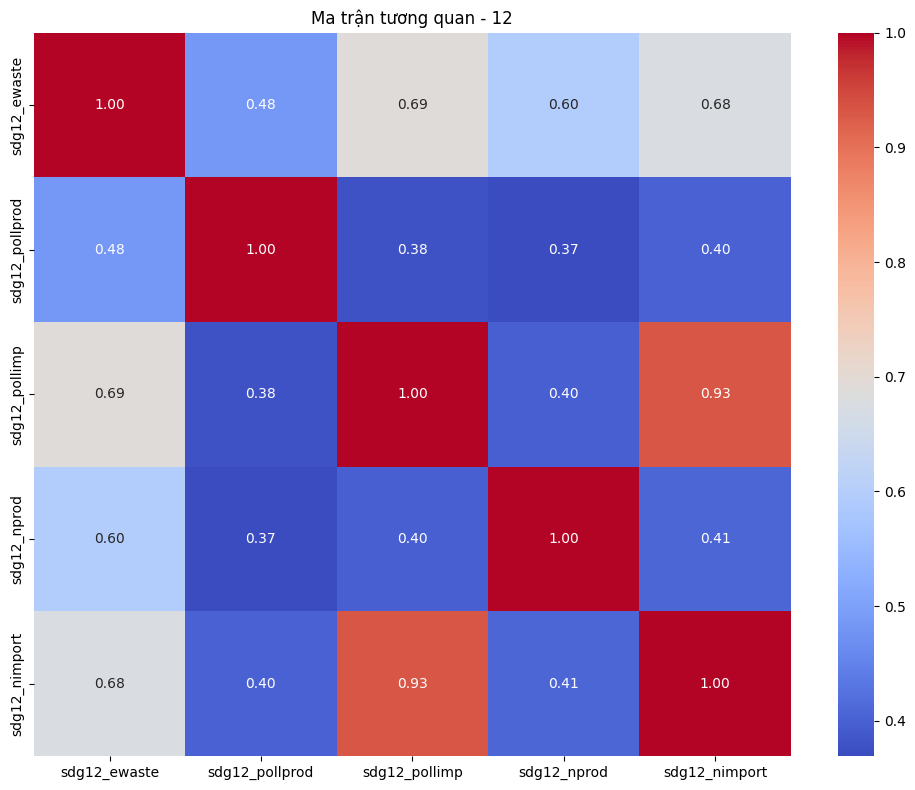


Đánh giá mối quan hệ trong nhóm 12:
sdg12_ewaste và sdg12_pollprod: Mối quan hệ trung bình
sdg12_ewaste và sdg12_pollimp: Mối quan hệ trung bình
sdg12_ewaste và sdg12_nprod: Mối quan hệ trung bình
sdg12_ewaste và sdg12_nimport: Mối quan hệ trung bình
sdg12_pollprod và sdg12_ewaste: Mối quan hệ trung bình
sdg12_pollprod và sdg12_pollimp: Mối quan hệ trung bình
sdg12_pollprod và sdg12_nprod: Mối quan hệ trung bình
sdg12_pollprod và sdg12_nimport: Mối quan hệ trung bình
sdg12_pollimp và sdg12_ewaste: Mối quan hệ trung bình
sdg12_pollimp và sdg12_pollprod: Mối quan hệ trung bình
sdg12_pollimp và sdg12_nprod: Mối quan hệ trung bình
sdg12_pollimp và sdg12_nimport: Mối quan hệ mạnh
sdg12_nprod và sdg12_ewaste: Mối quan hệ trung bình
sdg12_nprod và sdg12_pollprod: Mối quan hệ trung bình
sdg12_nprod và sdg12_pollimp: Mối quan hệ trung bình
sdg12_nprod và sdg12_nimport: Mối quan hệ trung bình
sdg12_nimport và sdg12_ewaste: Mối quan hệ trung bình
sdg12_nimport và sdg12_pollprod: Mối quan hệ trun

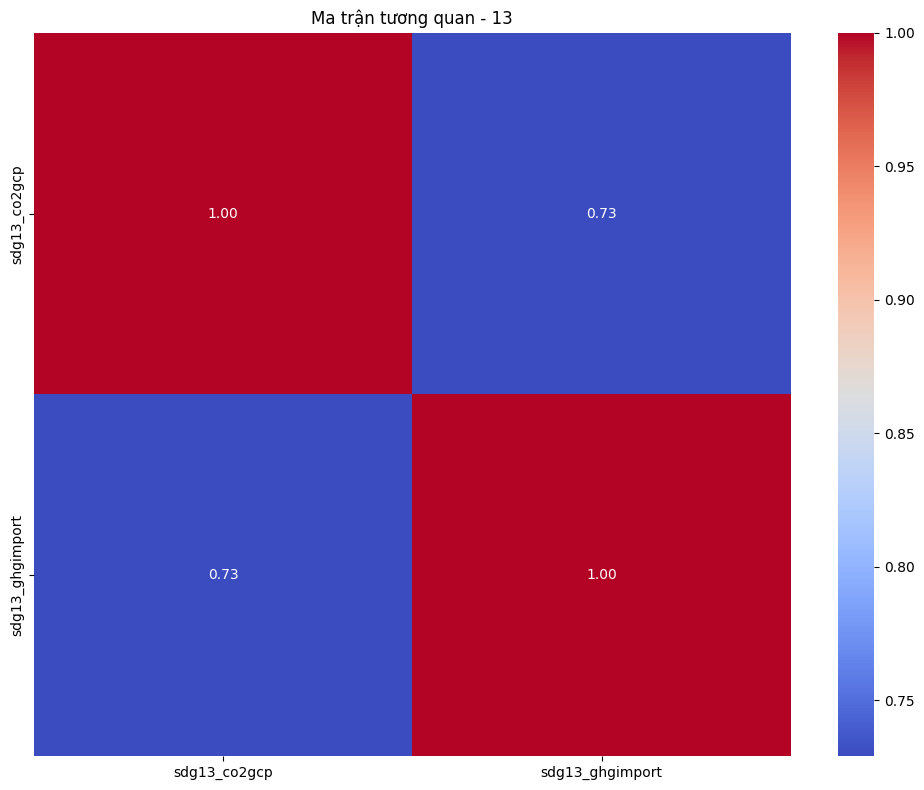


Đánh giá mối quan hệ trong nhóm 13:
sdg13_co2gcp và sdg13_ghgimport: Mối quan hệ mạnh
sdg13_ghgimport và sdg13_co2gcp: Mối quan hệ mạnh


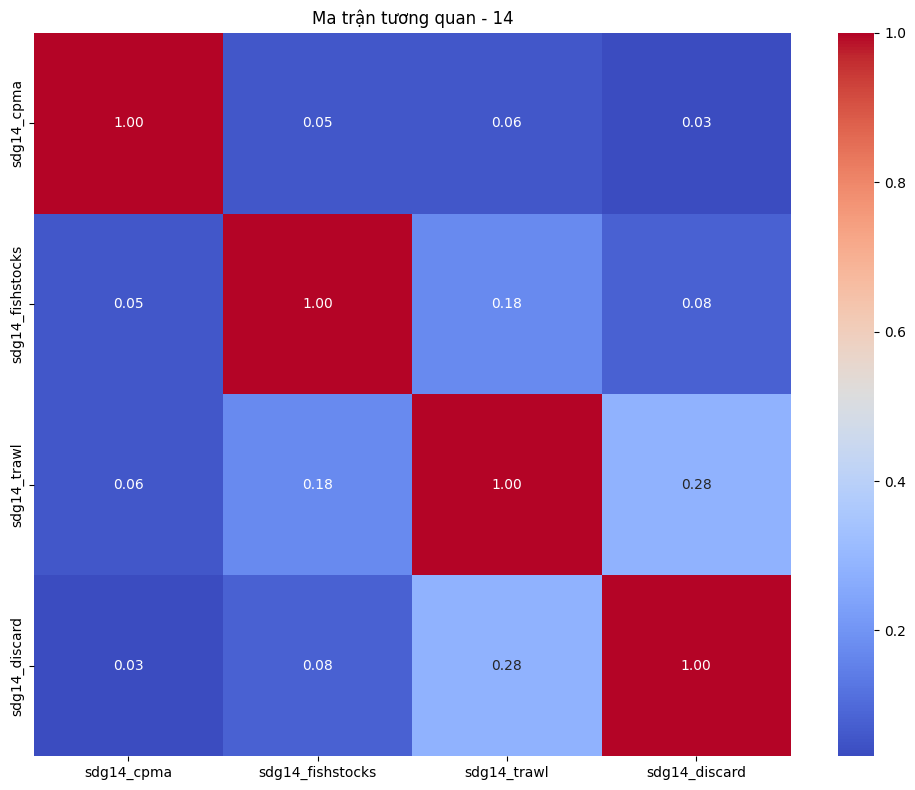


Đánh giá mối quan hệ trong nhóm 14:
sdg14_cpma và sdg14_fishstocks: Mối quan hệ yếu
sdg14_cpma và sdg14_trawl: Mối quan hệ yếu
sdg14_cpma và sdg14_discard: Mối quan hệ yếu
sdg14_fishstocks và sdg14_cpma: Mối quan hệ yếu
sdg14_fishstocks và sdg14_trawl: Mối quan hệ yếu
sdg14_fishstocks và sdg14_discard: Mối quan hệ yếu
sdg14_trawl và sdg14_cpma: Mối quan hệ yếu
sdg14_trawl và sdg14_fishstocks: Mối quan hệ yếu
sdg14_trawl và sdg14_discard: Mối quan hệ yếu
sdg14_discard và sdg14_cpma: Mối quan hệ yếu
sdg14_discard và sdg14_fishstocks: Mối quan hệ yếu
sdg14_discard và sdg14_trawl: Mối quan hệ yếu


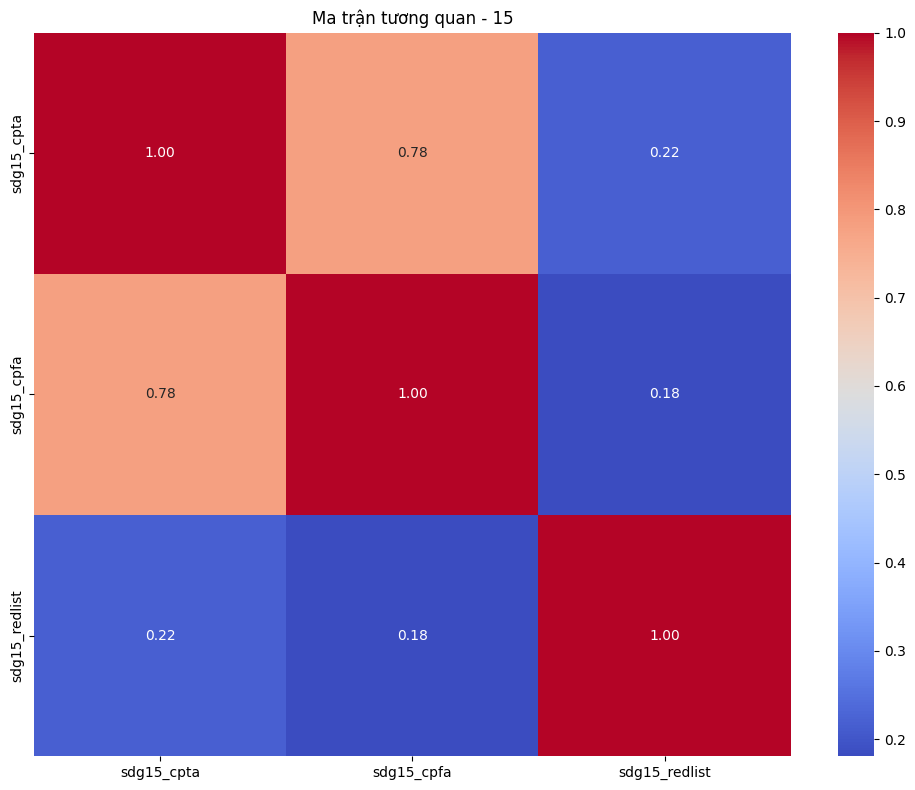


Đánh giá mối quan hệ trong nhóm 15:
sdg15_cpta và sdg15_cpfa: Mối quan hệ mạnh
sdg15_cpta và sdg15_redlist: Mối quan hệ yếu
sdg15_cpfa và sdg15_cpta: Mối quan hệ mạnh
sdg15_cpfa và sdg15_redlist: Mối quan hệ yếu
sdg15_redlist và sdg15_cpta: Mối quan hệ yếu
sdg15_redlist và sdg15_cpfa: Mối quan hệ yếu



Đánh giá mối quan hệ trong nhóm 16:
sdg16_homicides và sdg16_detain: Mối quan hệ yếu
sdg16_homicides và sdg16_u5reg: Mối quan hệ yếu
sdg16_homicides và sdg16_cpi: Mối quan hệ yếu
sdg16_homicides và sdg16_clabor: Mối quan hệ yếu
sdg16_homicides và sdg16_rsf: Mối quan hệ yếu
sdg16_homicides và sdg16_justice: Mối quan hệ yếu
sdg16_homicides và sdg16_prison: Mối quan hệ yếu
sdg16_detain và sdg16_homicides: Mối quan hệ yếu
sdg16_detain và sdg16_u5reg: Mối quan hệ trung bình
sdg16_detain và sdg16_cpi: Mối quan hệ trung bình
sdg16_detain và sdg16_clabor: Mối quan hệ trung bình
sdg16_detain và sdg16_rsf: Mối quan hệ yếu
sdg16_detain và sdg16_justice: Mối quan hệ trung bình
sdg16_detain và sdg16_prison: Mối quan hệ yếu
sdg16_u5reg và sdg16_homicides: Mối quan hệ yếu
sdg16_u5reg và sdg16_detain: Mối quan hệ trung bình
sdg16_u5reg và sdg16_cpi: Mối quan hệ trung bình
sdg16_u5reg và sdg16_clabor: Mối quan hệ mạnh
sdg16_u5reg và sdg16_rsf: Mối quan hệ trung bình
sdg16_u5reg và sdg16_justice: Mối q


Đánh giá mối quan hệ trong nhóm 17:
sdg17_govex và sdg17_statperf: Mối quan hệ trung bình
sdg17_statperf và sdg17_govex: Mối quan hệ trung bình


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Hàm đánh giá mối quan hệ dựa trên hệ số tương quan
def evaluate_correlation(corr_matrix):
    evaluation = {}
    for row in corr_matrix.columns:
        for col in corr_matrix.index:
            corr_value = corr_matrix.loc[col, row]
            if row != col:  # Loại bỏ các cặp tương quan với chính nó
                if abs(corr_value) >= 0.7:
                    evaluation[(row, col)] = "Mối quan hệ mạnh"
                elif abs(corr_value) >= 0.3:
                    evaluation[(row, col)] = "Mối quan hệ trung bình"
                else:
                    evaluation[(row, col)] = "Mối quan hệ yếu"
    return evaluation

# Vẽ heatmap và tự động đánh giá
for sdg_name, sdg_vars in sdg_groups.items():
    plt.figure(figsize=(10, 8))
    corr_matrix = df_scaled[sdg_vars].corr()  # Ma trận tương quan
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"Ma trận tương quan - {sdg_name}")
    plt.tight_layout()
    plt.show()

    # Đánh giá mối quan hệ
    evaluation = evaluate_correlation(corr_matrix)
    print(f"\nĐánh giá mối quan hệ trong nhóm {sdg_name}:")
    for pair, relationship in evaluation.items():
        print(f"{pair[0]} và {pair[1]}: {relationship}")
    print("="*50)


In [ ]:
# Tính trung bình các chỉ số theo từng nhóm SDG và in dòng đầu tiên
for sdg_num, cols in sorted(sdg_groups.items()):
    # Tính trung bình cho các chỉ số của nhóm SDG
    df[f'SDG{sdg_num}_Index'] = df[cols].mean(axis=1, skipna=True)

    # In ra dòng đầu tiên của DataFrame sau khi tính trung bình
    print(f"Trung bình cho nhóm SDG{sdg_num} (dòng đầu tiên):")
    print(df[[f'SDG{sdg_num}_Index']].head(1))  # In dòng đầu tiên của cột vừa tính toán
    print("="*50)  # Dòng phân cách cho dễ nhìn


Trung bình cho nhóm SDG1 (dòng đầu tiên):
   SDG1_Index
0     73.3625
Trung bình cho nhóm SDG2 (dòng đầu tiên):
   SDG2_Index
0   12.781167
Trung bình cho nhóm SDG3 (dòng đầu tiên):
   SDG3_Index
0  165.061886
Trung bình cho nhóm SDG4 (dòng đầu tiên):
   SDG4_Index
0    60.53675
Trung bình cho nhóm SDG5 (dòng đầu tiên):
   SDG5_Index
0   19.600333
Trung bình cho nhóm SDG6 (dòng đầu tiên):
   SDG6_Index
0   1280.4876
Trung bình cho nhóm SDG7 (dòng đầu tiên):
   SDG7_Index
0      4.9775
Trung bình cho nhóm SDG8 (dòng đầu tiên):
   SDG8_Index
0    9.307333
Trung bình cho nhóm SDG9 (dòng đầu tiên):
   SDG9_Index
0   29.613935
Trung bình cho nhóm SDG11 (dòng đầu tiên):
   SDG11_Index
0    38.497083
Trung bình cho nhóm SDG12 (dòng đầu tiên):
   SDG12_Index
0     2.853367
Trung bình cho nhóm SDG13 (dòng đầu tiên):
   SDG13_Index
0        1.134
Trung bình cho nhóm SDG14 (dòng đầu tiên):
   SDG14_Index
0     21.86125
Trung bình cho nhóm SDG15 (dòng đầu tiên):
   SDG15_Index
0        0.309
Trung

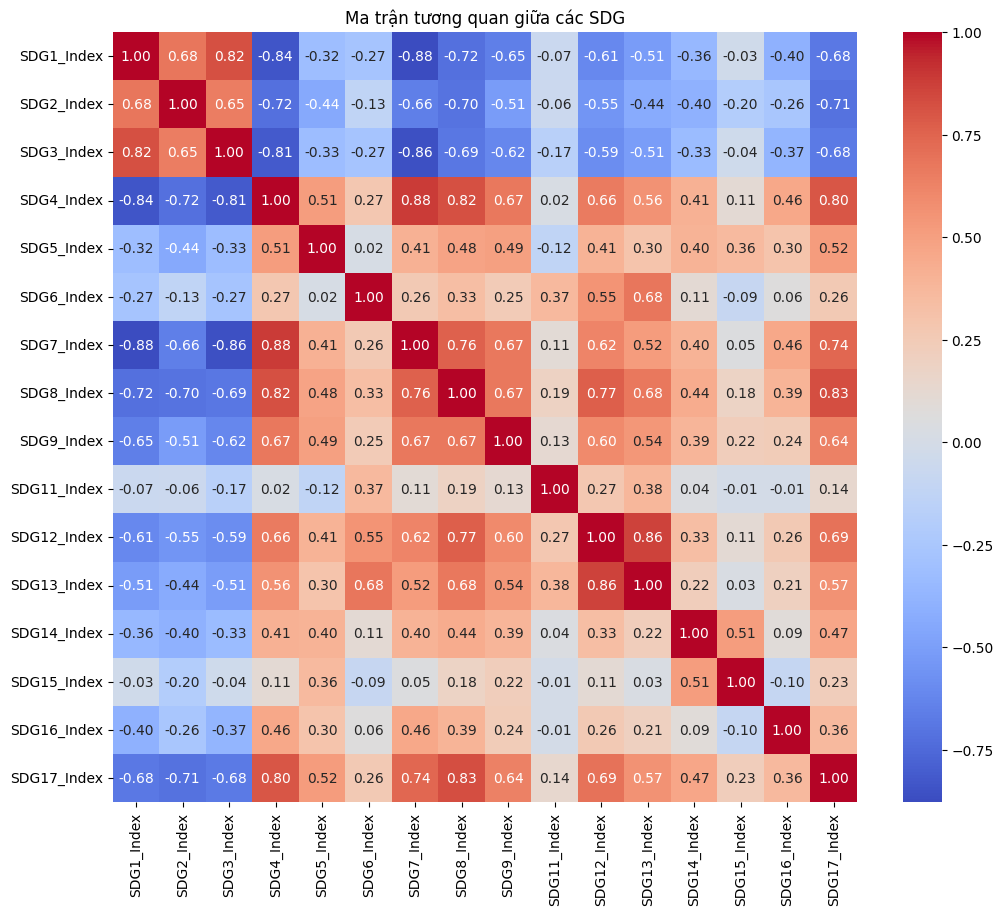


Đánh giá mối quan hệ giữa các chỉ số SDG:
SDG1_Index và SDG2_Index: Mối quan hệ trung bình
SDG1_Index và SDG3_Index: Mối quan hệ mạnh
SDG1_Index và SDG4_Index: Mối quan hệ mạnh
SDG1_Index và SDG5_Index: Mối quan hệ trung bình
SDG1_Index và SDG6_Index: Mối quan hệ yếu
SDG1_Index và SDG7_Index: Mối quan hệ mạnh
SDG1_Index và SDG8_Index: Mối quan hệ mạnh
SDG1_Index và SDG9_Index: Mối quan hệ trung bình
SDG1_Index và SDG11_Index: Mối quan hệ yếu
SDG1_Index và SDG12_Index: Mối quan hệ trung bình
SDG1_Index và SDG13_Index: Mối quan hệ trung bình
SDG1_Index và SDG14_Index: Mối quan hệ trung bình
SDG1_Index và SDG15_Index: Mối quan hệ yếu
SDG1_Index và SDG16_Index: Mối quan hệ trung bình
SDG1_Index và SDG17_Index: Mối quan hệ trung bình
SDG2_Index và SDG1_Index: Mối quan hệ trung bình
SDG2_Index và SDG3_Index: Mối quan hệ trung bình
SDG2_Index và SDG4_Index: Mối quan hệ mạnh
SDG2_Index và SDG5_Index: Mối quan hệ trung bình
SDG2_Index và SDG6_Index: Mối quan hệ yếu
SDG2_Index và SDG7_Index: Mố

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Hàm đánh giá mối quan hệ dựa trên hệ số tương quan
def evaluate_correlation(corr_matrix):
    evaluation = {}
    for row in corr_matrix.columns:
        for col in corr_matrix.index:
            corr_value = corr_matrix.loc[col, row]
            if row != col:  # Loại bỏ các cặp tương quan với chính nó
                if abs(corr_value) >= 0.7:
                    evaluation[(row, col)] = "Mối quan hệ mạnh"
                elif abs(corr_value) >= 0.3:
                    evaluation[(row, col)] = "Mối quan hệ trung bình"
                else:
                    evaluation[(row, col)] = "Mối quan hệ yếu"
    return evaluation

# Tính ma trận tương quan cho các chỉ số SDG
sdg_index_cols = [f'SDG{num}_Index' for num in sorted(sdg_groups.keys())]
corr_matrix = df[sdg_index_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các SDG")
plt.show()

# Đánh giá mối quan hệ
evaluation = evaluate_correlation(corr_matrix)
print("\nĐánh giá mối quan hệ giữa các chỉ số SDG:")
for pair, relationship in evaluation.items():
    print(f"{pair[0]} và {pair[1]}: {relationship}")
print("="*50)


# Feature Engineering

## Tương tác đặc trưng

In [ ]:
import numpy as np

# Định nghĩa epsilon để tránh chia cho 0
eps = 1e-6

# Tạo các biến tương tác với ý nghĩa thực tế
df['sdg6_water_elec']            = df['sdg6_safewat'] * df['sdg7_elecac']  # Nước sạch và điện năng
df['sdg8_accounts_rdex']         = df['sdg8_accounts'] * df['sdg9_rdex']   # Tài khoản tài chính và nghiên cứu
df['sdg3_uhc_sanitation']        = df['sdg3_uhc'] * df['sdg6_sanita']      # Bảo hiểm y tế và vệ sinh
df['sdg11_slums_pollprod']       = df['sdg11_slums'] * df['sdg12_pollprod'] # Khu ổ chuột và ô nhiễm sản xuất
df['sdg13_co2_cpta']             = df['sdg13_co2gcp'] * df['sdg15_cpta']    # CO2 và diện tích cây trồng
df['sdg16_cpi_statperf']         = df['sdg16_cpi'] * df['sdg17_statperf']  # Tham nhũng và hiệu suất thống kê
df['sdg1_income_poverty_ratio']  = df['sdg1_wpc'] / (df['sdg1_lmicpov'] + eps)  # Tỷ lệ thu nhập và nghèo đói

# Danh sách các cột tương tác
interaction_cols = [
    'sdg6_water_elec', 'sdg8_accounts_rdex', 'sdg3_uhc_sanitation',
    'sdg11_slums_pollprod', 'sdg13_co2_cpta', 'sdg16_cpi_statperf',
    'sdg1_income_poverty_ratio'
]

# Hiển thị 5 dòng đầu của các đặc trưng tương tác
print("5 dòng đầu của các đặc trưng tương tác:")
print(df[interaction_cols].head())

5 dòng đầu của các đặc trưng tương tác:
   sdg6_water_elec  sdg8_accounts_rdex  sdg3_uhc_sanitation  \
0         0.003608            0.010744             4.300876   
1         0.008409            0.010744             6.548773   
2         0.014428            0.028132             7.110106   
3         0.021337            0.028132             7.671440   
4         0.029163            0.005379             8.235294   

   sdg11_slums_pollprod  sdg13_co2_cpta  sdg16_cpi_statperf  \
0              0.013454             0.0            0.155665   
1              0.014228             0.0            0.155665   
2              0.017035             0.0            0.155665   
3              0.018461             0.0            0.155665   
4              0.015822             0.0            0.156818   

   sdg1_income_poverty_ratio  
0                   0.806337  
1                   0.800802  
2                   0.795404  
3                   0.774755  
4                   0.781930  


## Biến động thời gian:
Tính tốc độ tăng trưởng hàng năm (YoY) cho các cột SDG.

In [ ]:
import pandas as pd

# Chọn các cột SDG gốc, loại bỏ cột YoY và 'sdg3_uhc'
sdg_cols = [col for col in df.columns if col.startswith('sdg') and '_yoy' not in col and col != 'sdg3_uhc']

# Sắp xếp dữ liệu theo Country và year
df.sort_values(['Country', 'year'], inplace=True)

# Tính phần trăm thay đổi YoY theo từng quốc gia
yoy_df = df.groupby('Country')[sdg_cols].pct_change(fill_method=None).add_suffix('_yoy')

# Ghép các cột YoY vào DataFrame gốc
df = pd.concat([df, yoy_df], axis=1)

# Lọc dữ liệu cho Vietnam để kiểm tra
vietnam_df = df[df['Country'] == 'Vietnam']

# Hiển thị các cột liên quan (Country, year và YoY)
cols_to_display = ['Country', 'year'] + [col for col in df.columns if '_yoy' in col]
print("Dữ liệu YoY cho Vietnam (5 dòng đầu):")
print(vietnam_df[cols_to_display].head())

Dữ liệu YoY cho Vietnam (5 dòng đầu):
      Country  year  sdg1_wpc_yoy  sdg1_wpc_yoy  sdg1_lmicpov_yoy  \
4050  Vietnam  2000           NaN           NaN               NaN   
4051  Vietnam  2001      0.026850      0.026852          0.005905   
4052  Vietnam  2002      0.025503      0.025506          0.005706   
4053  Vietnam  2003     -0.137842     -0.137855         -0.085104   
4054  Vietnam  2004     -0.136624     -0.136638         -0.087531   

      sdg1_lmicpov_yoy  sdg2_undernsh_yoy  sdg2_undernsh_yoy  \
4050               NaN                NaN                NaN   
4051          0.005906          -0.001025          -0.001175   
4052          0.005707          -0.092308          -0.105882   
4053         -0.085120          -0.096045          -0.111842   
4054         -0.087550          -0.043750          -0.051852   

      sdg2_stunting_yoy  sdg2_stunting_yoy  ...  sdg3_uhc_sanitation_yoy  \
4050                NaN                NaN  ...                      NaN   
4051      

## Chuẩn hóa theo nhóm SDG:
Sử dụng MinMaxScaler để chuẩn hóa các cột trong mỗi nhóm SDG về [0, 1].

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Lọc các cột SDG gốc (không bao gồm YoY và sdg3_uhc)
sdg_cols = [col for col in df.columns if col.startswith('sdg') and '_yoy' not in col and col != 'sdg3_uhc']

# Tạo từ điển nhóm SDG dựa trên prefix (sdg1, sdg2,...)
sdg_groups = {}
for col in sdg_cols:
    group = col.split('_')[0]  # Lấy prefix (ví dụ: sdg1)
    if group not in sdg_groups:
        sdg_groups[group] = []
    sdg_groups[group].append(col)

# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa từng nhóm SDG
for group, cols in sdg_groups.items():
    df[cols] = scaler.fit_transform(df[cols])
    print(f"Đã chuẩn hóa nhóm {group} với các cột: {cols}")
    print(df[cols].head())
    print("=" * 50)

Đã chuẩn hóa nhóm sdg1 với các cột: ['sdg1_wpc', 'sdg1_lmicpov', 'sdg1_income_poverty_ratio']
   sdg1_wpc  sdg1_lmicpov  sdg1_income_poverty_ratio
0  0.688489      0.853847                   0.008029
1  0.680377      0.849618                   0.007974
2  0.672331      0.845269                   0.007920
3  0.641088      0.827471                   0.007715
4  0.651722      0.833477                   0.007786
Đã chuẩn hóa nhóm sdg2 với các cột: ['sdg2_undernsh', 'sdg2_stunting', 'sdg2_obesity', 'sdg2_trophic', 'sdg2_crlyld', 'sdg2_snmi']
   sdg2_undernsh  sdg2_stunting  sdg2_obesity  sdg2_trophic  sdg2_crlyld  \
0       0.404094       0.590551      0.083919      0.138454     0.021925   
1       0.641813       0.590551      0.091374      0.099040     0.027392   
2       0.608187       0.590551      0.099255      0.137948     0.045427   
3       0.533626       0.590551      0.107774      0.122789     0.039661   
4       0.494152       0.925984      0.116720      0.123295     0.036315   



## Trực quan hóa đặc trưng mới: Dùng pairplot với histogram để khám phá mối quan hệ và phân phối của các đặc trưng tương tác.

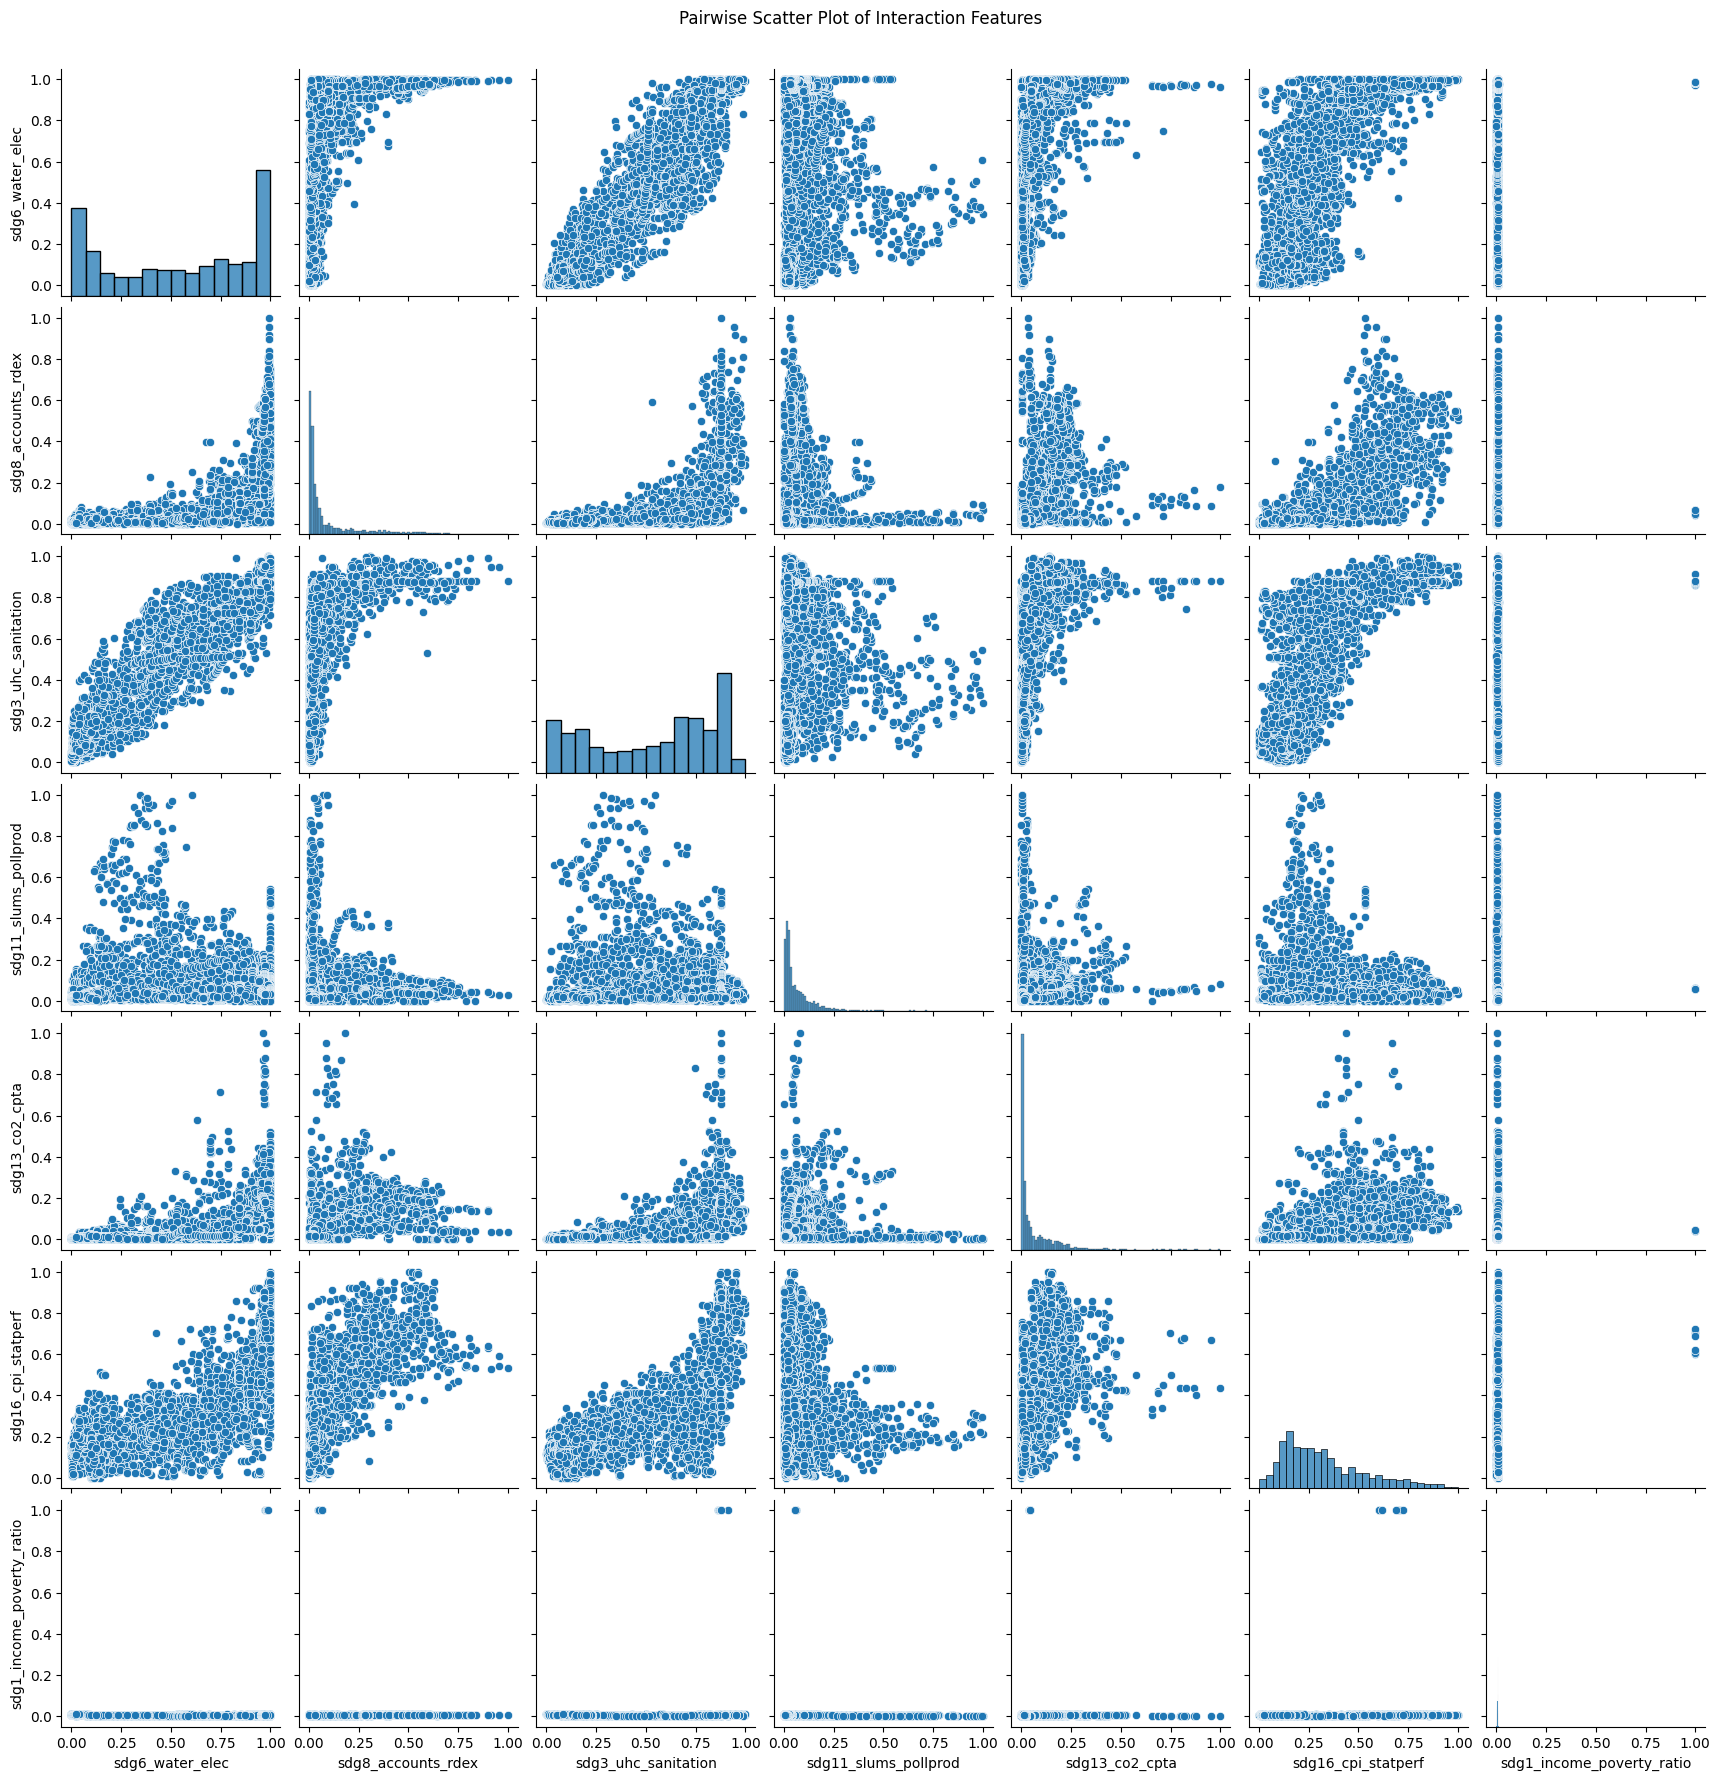

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Danh sách các cột tương tác
interaction_columns = [
    'sdg6_water_elec', 'sdg8_accounts_rdex', 'sdg3_uhc_sanitation',
    'sdg11_slums_pollprod', 'sdg13_co2_cpta', 'sdg16_cpi_statperf',
    'sdg1_income_poverty_ratio'
]

# Vẽ pairplot với histogram trên đường chéo
sns.pairplot(df[interaction_columns], diag_kind='hist')

# Thêm tiêu đề
plt.suptitle("Pairwise Scatter Plot of Interaction Features", y=1.02)

# Hiển thị biểu đồ
plt.show()

## PCA: Giảm chiều dữ liệu tương tác xuống 2 thành phần chính và hiển thị tỷ lệ phương sai giải thích.

Tỷ lệ phương sai giải thích: PC1 = 0.52, PC2 = 0.15


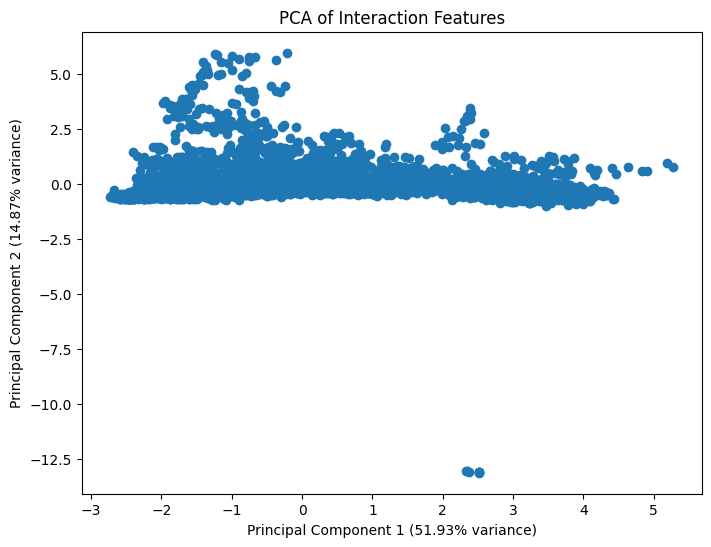

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Danh sách các cột tương tác
interaction_columns = [
    'sdg6_water_elec', 'sdg8_accounts_rdex', 'sdg3_uhc_sanitation',
    'sdg11_slums_pollprod', 'sdg13_co2_cpta', 'sdg16_cpi_statperf',
    'sdg1_income_poverty_ratio'
]

# Chuẩn hóa dữ liệu trước khi áp dụng PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[interaction_columns])

# Áp dụng PCA với 2 thành phần chính
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Tỷ lệ phương sai giải thích
explained_var = pca.explained_variance_ratio_
print(f"Tỷ lệ phương sai giải thích: PC1 = {explained_var[0]:.2f}, PC2 = {explained_var[1]:.2f}")

# Vẽ scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title("PCA of Interaction Features")
plt.xlabel(f"Principal Component 1 ({explained_var[0]:.2%} variance)")
plt.ylabel(f"Principal Component 2 ({explained_var[1]:.2%} variance)")
plt.show()

## Feature Selection


Chuẩn bị dữ liệu: chọn các đặc trưng số và loại bỏ giá trị NaN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_selection = df[numerical_cols]

# 2.0 Xử lý NaN và Inf trước khi tính VIF
print("\n2.0 Xử lý NaN và Inf:")
# Thay thế Inf bằng giá trị lớn nhất không phải Inf
df_selection = df_selection.replace([np.inf, -np.inf], np.nan)
# Điền NaN bằng giá trị trung bình của cột
df_selection = df_selection.fillna(df_selection.mean())
# Kiểm tra lại NaN và Inf
if df_selection.isna().any().any() or np.isinf(df_selection.values).any():
    print("Cảnh báo: Vẫn còn NaN hoặc Inf trong dữ liệu!")
else:
    print("Dữ liệu đã sạch, không còn NaN hoặc Inf.")


2.0 Xử lý NaN và Inf:
Dữ liệu đã sạch, không còn NaN hoặc Inf.


## Loại bỏ đa trọng tuyến (Multicollinearity) bằng VIF

In [ ]:
print("\n2.1 Kiểm tra đa trọng tuyến bằng VIF:")
vif_data = pd.DataFrame()
vif_data["Feature"] = df_selection.columns
vif_data["VIF"] = [variance_inflation_factor(df_selection.values, i) for i in range(df_selection.shape[1])]


2.1 Kiểm tra đa trọng tuyến bằng VIF:


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Lọc các đặc trưng có VIF < 10

In [ ]:
selected_features_vif = vif_data[vif_data["VIF"] < 10]["Feature"].tolist()
print("Các đặc trưng sau khi loại bỏ đa trọng tuyến (VIF < 10):")
print(selected_features_vif)

Các đặc trưng sau khi loại bỏ đa trọng tuyến (VIF < 10):
['sdg2_undernsh', 'sdg2_crlyld', 'sdg3_tb', 'sdg3_hiv', 'sdg5_parl', 'sdg6_freshwat', 'sdg6_scarcew', 'sdg7_co2twh', 'sdg7_renewcon', 'sdg8_unemp', 'sdg9_mobuse', 'sdg9_articles', 'sdg12_pollprod', 'sdg12_nprod', 'sdg14_fishstocks', 'sdg14_trawl', 'sdg14_discard', 'sdg16_homicides', 'sdg16_prison', 'sdg11_slums_pollprod', 'sdg13_co2_cpta', 'sdg1_income_poverty_ratio']


## Lựa chọn đặc trưng với L1 Regularization (Lasso)

In [ ]:
print("\n2.2 Lựa chọn đặc trưng với Lasso:")
# Kiểm tra biến mục tiêu
if 'SDG Index Score' not in df_selection.columns:
    print("Lỗi: Không tìm thấy 'SDG Index Score'. Sử dụng cột đầu tiên làm biến mục tiêu để minh họa.")
    y = df_selection.iloc[:, 0]  # Thay thế bằng cột mục tiêu thực tế
    X = df_selection.drop(columns=df_selection.columns[0])
else:
    X = df_selection.drop(columns=['SDG Index Score'])
    y = df_selection['SDG Index Score']

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
selected_features_lasso = X.columns[lasso.coef_ != 0].tolist()
print("Các đặc trưng được chọn bởi Lasso:")
print(selected_features_lasso)


2.2 Lựa chọn đặc trưng với Lasso:
Các đặc trưng được chọn bởi Lasso:
['year', 'sdg1_lmicpov', 'sdg2_undernsh', 'sdg2_obesity', 'sdg2_snmi', 'sdg3_neonat', 'sdg3_lifee', 'sdg3_fertility', 'sdg3_uhc', 'sdg5_lfpr', 'sdg5_parl', 'sdg6_sanita', 'sdg7_elecac', 'sdg7_renewcon', 'sdg9_intuse', 'sdg11_pm25', 'sdg14_cpma', 'sdg15_cpta', 'sdg15_cpfa', 'sdg16_detain', 'sdg17_govex', 'sdg6_water_elec', 'sdg16_cpi_statperf', 'sdg1_wpc_yoy', 'sdg1_lmicpov_yoy', 'sdg2_undernsh_yoy', 'sdg3_neonat_yoy', 'sdg3_u5mort_yoy', 'sdg3_tb_yoy', 'sdg3_tb_yoy', 'sdg3_hiv_yoy', 'sdg6_freshwat_yoy', 'sdg6_scarcew_yoy', 'sdg7_renewcon_yoy', 'sdg7_renewcon_yoy', 'sdg8_impacc_yoy', 'sdg8_impacc_yoy', 'sdg9_mobuse_yoy', 'sdg9_mobuse_yoy', 'sdg9_rdex_yoy', 'sdg9_rdex_yoy', 'sdg13_ghgimport_yoy', 'sdg14_trawl_yoy', 'sdg14_trawl_yoy', 'sdg14_discard_yoy', 'sdg14_discard_yoy', 'sdg16_homicides_yoy', 'sdg16_homicides_yoy', 'sdg16_u5reg_yoy', 'sdg16_prison_yoy', 'sdg8_accounts_rdex_yoy', 'sdg1_income_poverty_ratio_yoy', 'sd

## Feature Importance với Random Forest

In [ ]:
print("\n2.3 Feature Importance với Random Forest:")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Tầm quan trọng đặc trưng từ Random Forest (Top 10):")
print(feature_importance.head(10))


2.3 Feature Importance với Random Forest:
Tầm quan trọng đặc trưng từ Random Forest (Top 10):
          Feature  Importance
11    sdg3_u5mort    0.469834
31    sdg6_sanita    0.312386
30     sdg6_water    0.021236
3   sdg2_undernsh    0.015152
9    sdg3_matmort    0.013182
64     sdg15_cpfa    0.012952
49     sdg11_pm25    0.011166
28      sdg5_lfpr    0.011000
39  sdg7_renewcon    0.010948
2    sdg1_lmicpov    0.008845


# Trực quan hóa

In [ ]:
# 3.1 Heatmap tương quan
print("\n3.1 Vẽ Heatmap tương quan:")
corr_matrix = df_selection.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.savefig('correlation_heatmap.png')
plt.close()


3.1 Vẽ Heatmap tương quan:


In [ ]:
# 3.2 Biểu đồ tầm quan trọng đặc trưng từ Random Forest
print("\n3.2 Vẽ biểu đồ tầm quan trọng đặc trưng:")
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Feature Importance from Random Forest")
plt.savefig('feature_importance.png')
plt.close()



3.2 Vẽ biểu đồ tầm quan trọng đặc trưng:



3.1 Vẽ Heatmap tương quan:


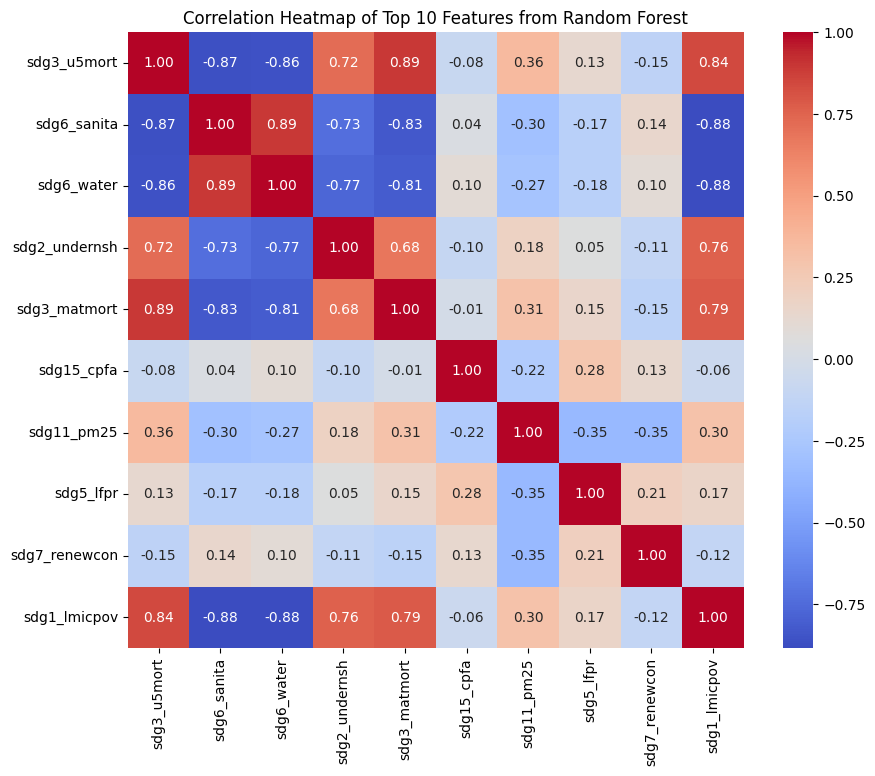

In [ ]:
# 3.1 Heatmap tương quan (Chỉ cho top đặc trưng quan trọng)
print("\n3.1 Vẽ Heatmap tương quan:")
# Kiểm tra dữ liệu đầu vào
if df_selection.empty:
    print("Lỗi: df_selection rỗng, không thể vẽ heatmap.")
else:
    # Chọn top 10 đặc trưng từ Random Forest
    top_features = feature_importance.head(10)['Feature'].tolist()
    if not top_features:
        print("Lỗi: Không có đặc trưng nào được chọn từ feature_importance.")
    else:
        # Tính ma trận tương quan chỉ cho top đặc trưng
        corr_matrix = df_selection[top_features].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
        plt.title("Correlation Heatmap of Top 10 Features from Random Forest")
        plt.savefig('correlation_heatmap_top10.png', dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()


3.2 Vẽ biểu đồ tầm quan trọng đặc trưng:


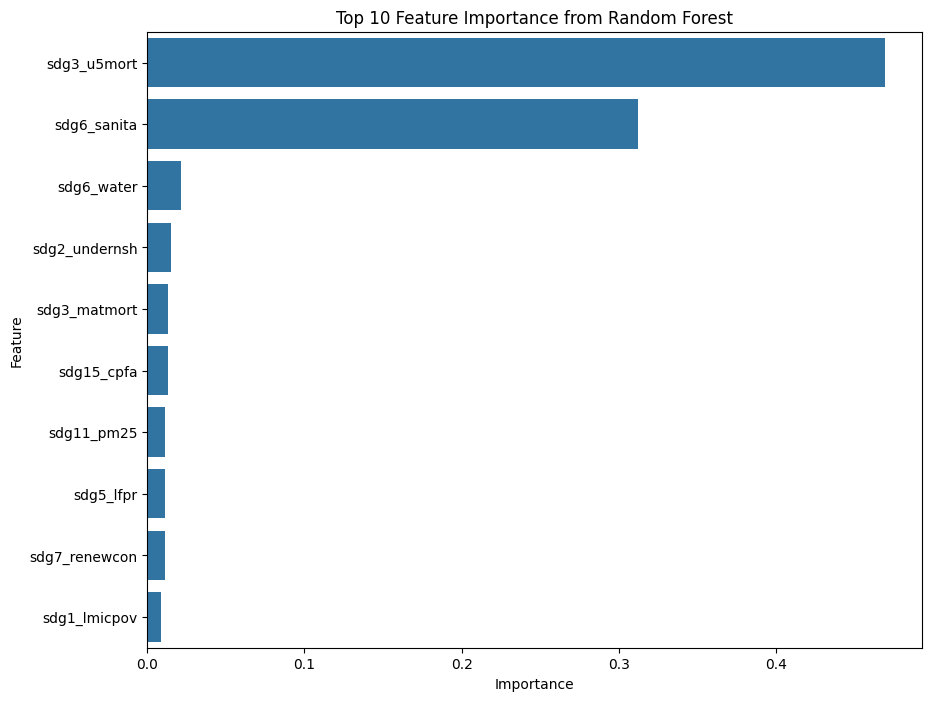

In [ ]:
# 3.2 Biểu đồ tầm quan trọng đặc trưng từ Random Forest
print("\n3.2 Vẽ biểu đồ tầm quan trọng đặc trưng:")
# Kiểm tra dữ liệu đầu vào
if feature_importance.empty:
    print("Lỗi: feature_importance rỗng, không thể vẽ biểu đồ.")
else:
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
    plt.title("Top 10 Feature Importance from Random Forest")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.savefig('feature_importance_top10.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [ ]:
# 3.3 PCA cho các đặc trưng
print("\n3.3 PCA cho các đặc trưng:")
# Kết hợp đặc trưng tương tác và top đặc trưng từ VIF/Lasso
# Loại bỏ trùng lặp từ danh sách Lasso
selected_features_lasso_unique = list(dict.fromkeys(selected_features_lasso))  # Loại bỏ trùng lặp
combined_features = list(set(interaction_cols + selected_features_vif + selected_features_lasso_unique))
# Giới hạn số cột để tránh quá tải PCA
combined_features = combined_features[:15]  # Chọn top 15 đặc trưng

# Kiểm tra dữ liệu đầu vào
df_combined = df[combined_features].copy()
if df_combined.empty:
    print("Lỗi: df_combined rỗng, không thể thực hiện PCA.")
else:
    # Xử lý NaN, Inf, và giá trị lớn
    df_combined = df_combined.replace([np.inf, -np.inf], np.nan)
    # Điền NaN bằng giá trị trung bình của cột
    df_combined = df_combined.fillna(df_combined.mean())
    # Giới hạn giá trị cực đại để tránh lỗi
    max_value = 1e308  # Giới hạn tối đa của float64
    df_combined = df_combined.clip(lower=-max_value, upper=max_value)

    # Kiểm tra dữ liệu sau khi xử lý
    if df_combined.isna().any().any() or np.isinf(df_combined.values).any():
        print("Lỗi: Vẫn còn NaN hoặc Inf trong df_combined sau khi xử lý!")
    else:
        scaler = StandardScaler()
        try:
            df_scaled = scaler.fit_transform(df_combined)
            pca = PCA(n_components=2)
            df_pca = pca.fit_transform(df_scaled)
            explained_var = pca.explained_variance_ratio_
            print(f"Tỷ lệ phương sai giải thích: PC1 = {explained_var[0]:.2f}, PC2 = {explained_var[1]:.2f}")

            plt.figure(figsize=(8, 6))
            plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5)
            plt.title("PCA of Selected Features (Interaction + VIF + Lasso)")
            plt.xlabel(f"Principal Component 1 ({explained_var[0]:.2%} variance)")
            plt.ylabel(f"Principal Component 2 ({explained_var[1]:.2%} variance)")
            plt.savefig('pca_selected_features.png', dpi=300, bbox_inches='tight')
            plt.show()
            plt.close()
        except Exception as e:
            print(f"Lỗi khi thực hiện PCA: {e}")


3.3 PCA cho các đặc trưng:
Tỷ lệ phương sai giải thích: PC1 = 0.19, PC2 = 0.10


Feature Extraction

In [ ]:
# 3.1 PCA theo nhóm SDG
print("\n3.1 PCA theo nhóm SDG:")
pca_results = {}
for group, cols in sdg_groups.items():
    print(f"\nThực hiện PCA cho nhóm {group}:")
    df_group = df[cols].replace([np.inf, -np.inf], np.nan).fillna(df[cols].mean())
    if df_group.empty or len(cols) < 2:
        print(f"Bỏ qua nhóm {group}: Không đủ cột hoặc dữ liệu rỗng.")
        continue
    scaler = StandardScaler()
    try:
        df_scaled = scaler.fit_transform(df_group)
        pca = PCA()
        pca.fit(df_scaled)
        explained_var = pca.explained_variance_ratio_
        cumulative_var = np.cumsum(explained_var)
        pca_results[group] = {'explained_var': explained_var, 'cumulative_var': cumulative_var}
        print(f"Số thành phần: {len(explained_var)}, Phương sai tích lũy: {cumulative_var[-1]:.2%}")
    except Exception as e:
        print(f"Lỗi khi thực hiện PCA cho nhóm {group}: {e}")



3.1 PCA theo nhóm SDG:

Thực hiện PCA cho nhóm sdg1:
Số thành phần: 3, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg2:
Số thành phần: 6, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg3:
Số thành phần: 14, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg4:
Số thành phần: 4, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg5:
Số thành phần: 3, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg6:
Số thành phần: 7, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg7:
Số thành phần: 4, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg8:
Số thành phần: 4, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg9:
Số thành phần: 5, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg11:
Số thành phần: 5, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg12:
Số thành phần: 5, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg13:
Số thành phần: 3, Phương sai tích lũy: 100.00%

Thực hiện PCA cho nhóm sdg14:
Số thành phần: 4,

In [ ]:
# 3.2 T-SNE toàn bộ dữ liệu
print("\n3.2 T-SNE toàn bộ dữ liệu:")
# Chọn các cột số và xử lý NaN/Inf
df_tsne = df_selection.replace([np.inf, -np.inf], np.nan).fillna(df_selection.mean()).clip(lower=-max_value, upper=max_value)
if df_tsne.empty:
    print("Lỗi: Dữ liệu rỗng, không thể thực hiện T-SNE.")
else:
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_tsne)
    # Import TSNE from sklearn.manifold
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
    df_tsne = tsne.fit_transform(df_scaled)
    print("T-SNE hoàn tất, dữ liệu giảm xuống 2 chiều.")


3.2 T-SNE toàn bộ dữ liệu:
T-SNE hoàn tất, dữ liệu giảm xuống 2 chiều.



4.1 Vẽ Heatmap tương quan:


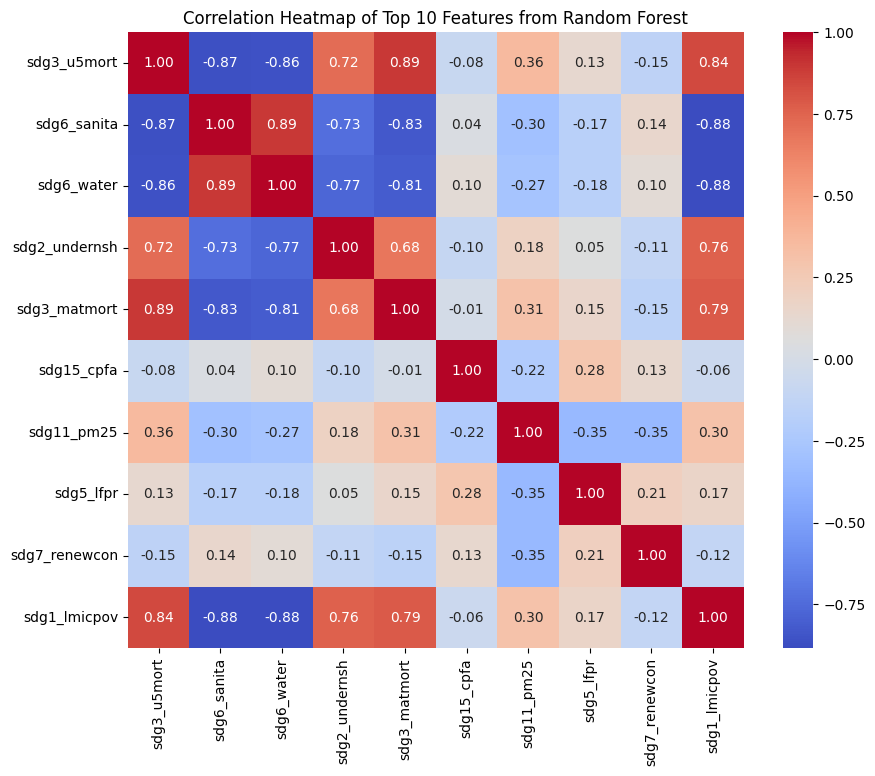

In [ ]:
# --- 4. Trực quan hóa ---
# 4.1 Heatmap tương quan
print("\n4.1 Vẽ Heatmap tương quan:")
if df_selection.empty:
    print("Lỗi: df_selection rỗng, không thể vẽ heatmap.")
else:
    top_features = feature_importance.head(10)['Feature'].tolist()
    if not top_features:
        print("Lỗi: Không có đặc trưng nào được chọn từ feature_importance.")
    else:
        corr_matrix = df_selection[top_features].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
        plt.title("Correlation Heatmap of Top 10 Features from Random Forest")
        plt.savefig('correlation_heatmap_top10.png', dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()


4.2 Vẽ biểu đồ tầm quan trọng đặc trưng:


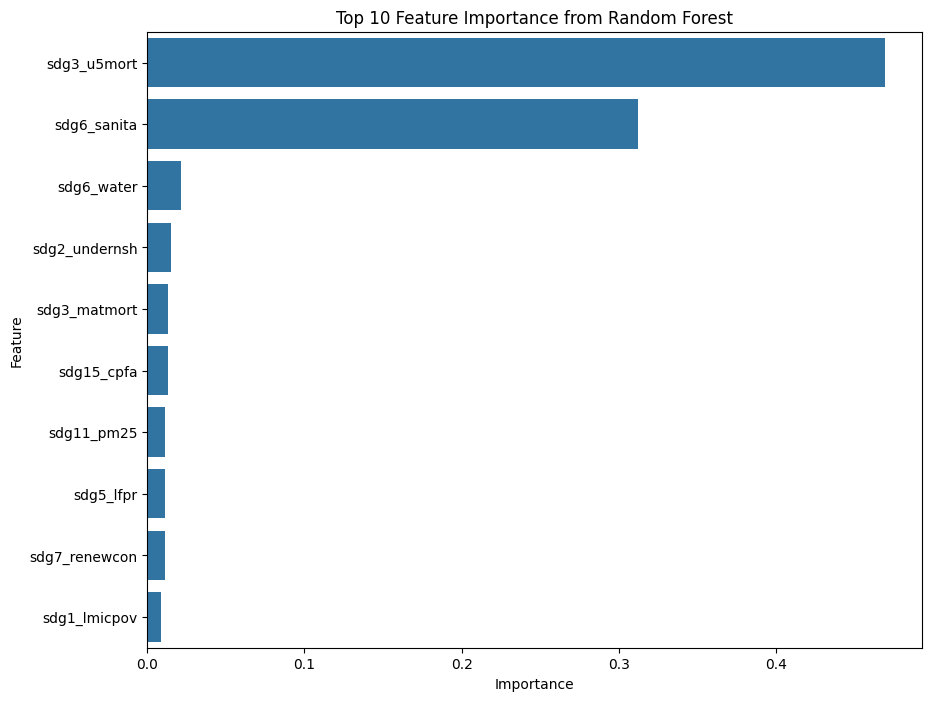

In [ ]:
# 4.2 Biểu đồ tầm quan trọng đặc trưng
print("\n4.2 Vẽ biểu đồ tầm quan trọng đặc trưng:")
if feature_importance.empty:
    print("Lỗi: feature_importance rỗng, không thể vẽ biểu đồ.")
else:
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
    plt.title("Top 10 Feature Importance from Random Forest")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.savefig('feature_importance_top10.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


4.3 Vẽ biểu đồ phương sai tích lũy cho PCA theo nhóm SDG:


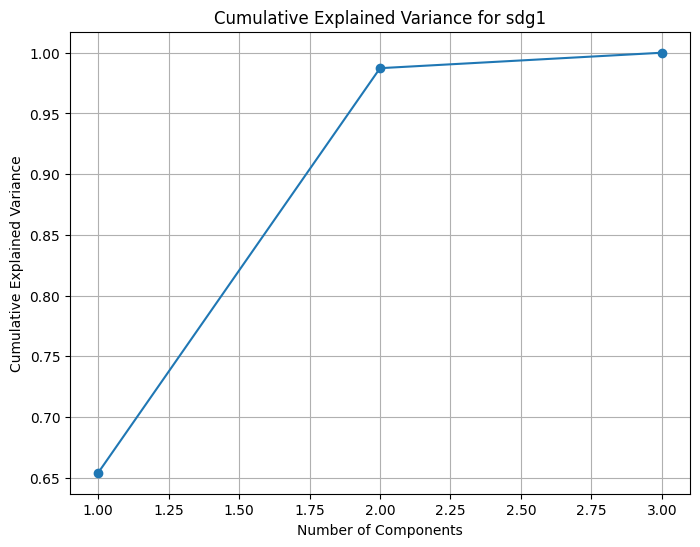

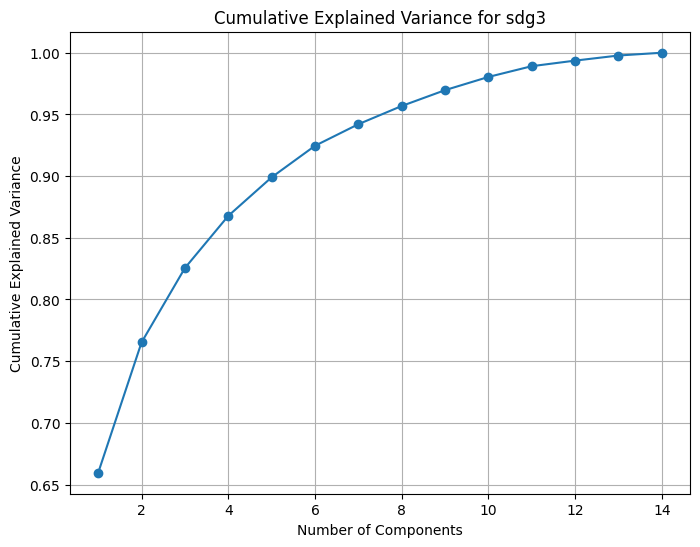

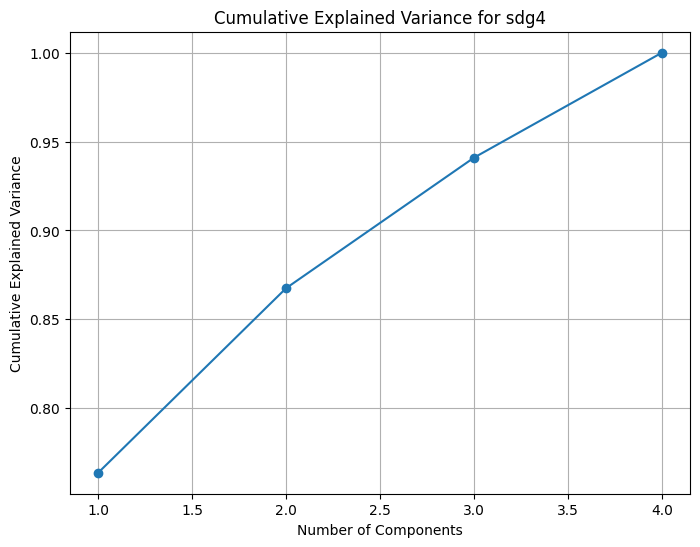

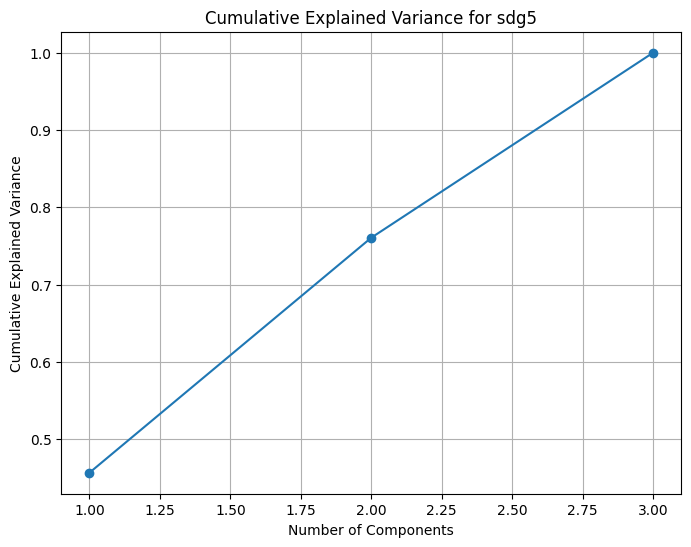

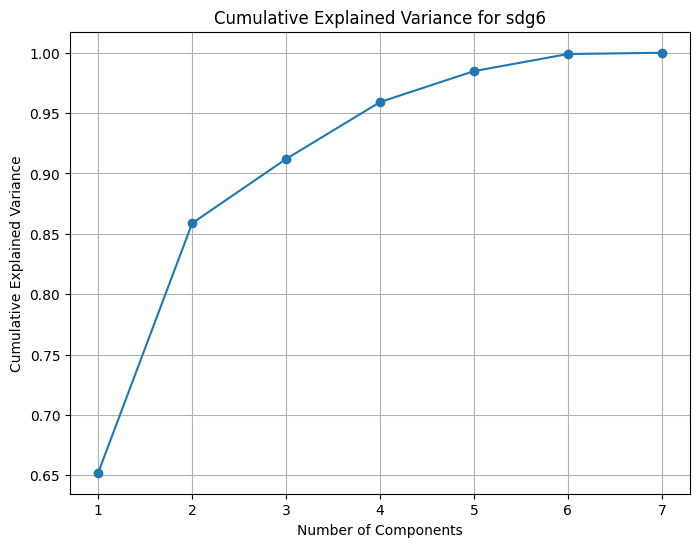

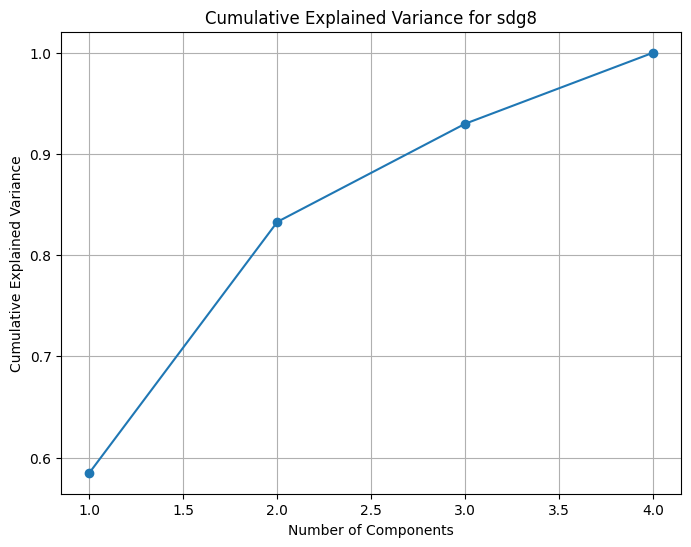

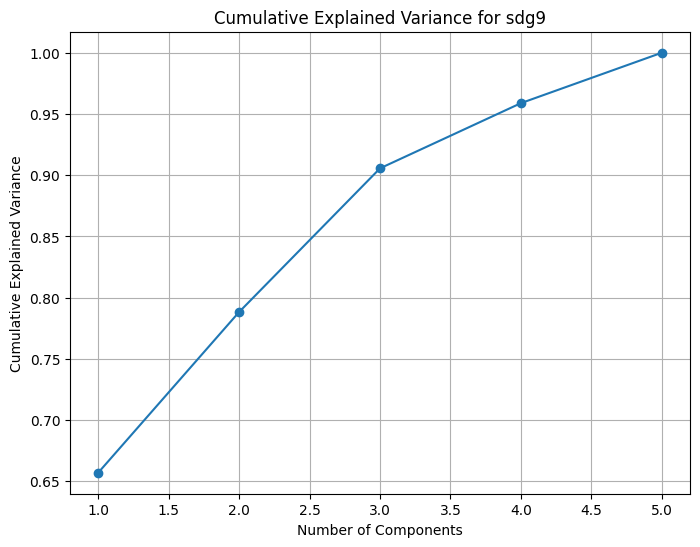

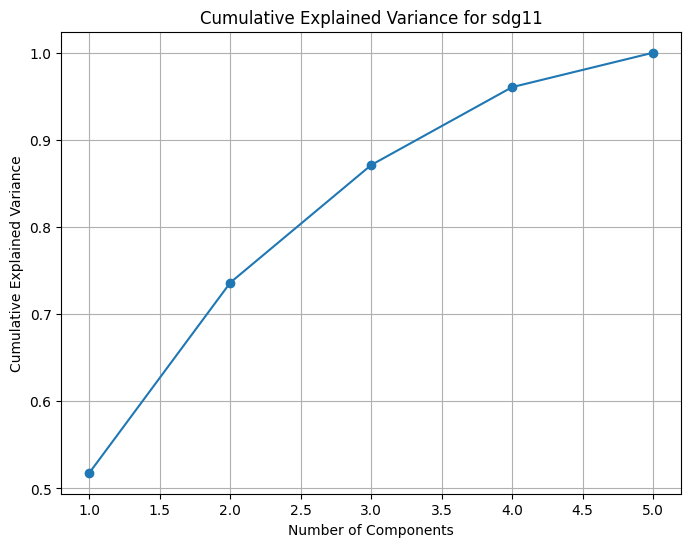

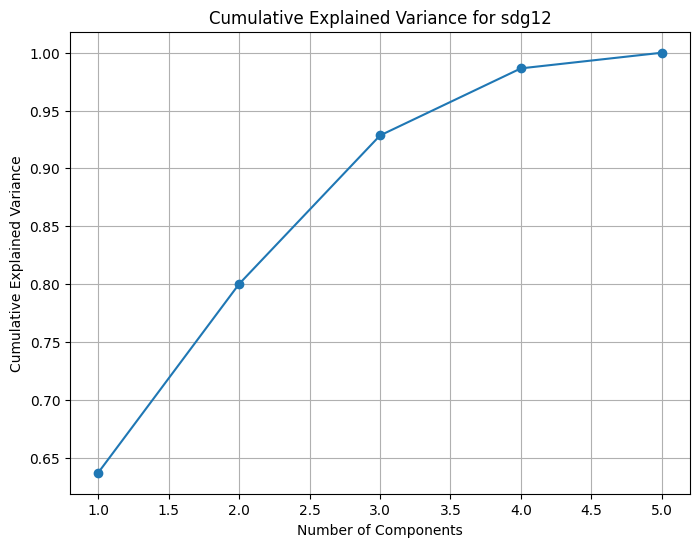

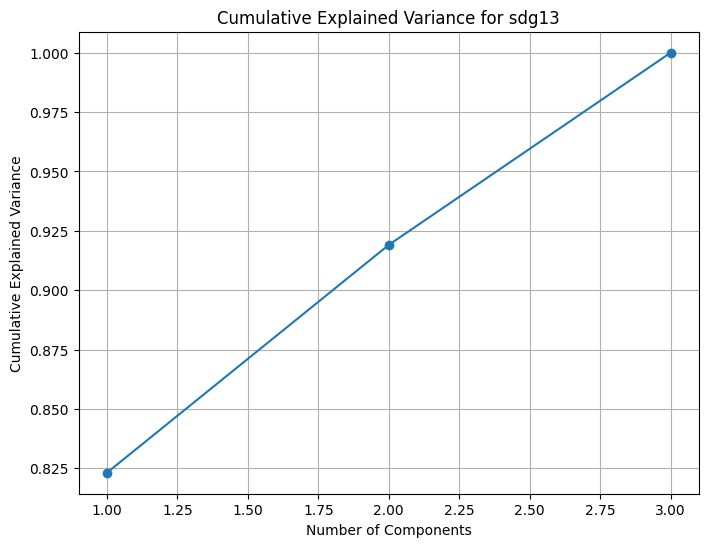

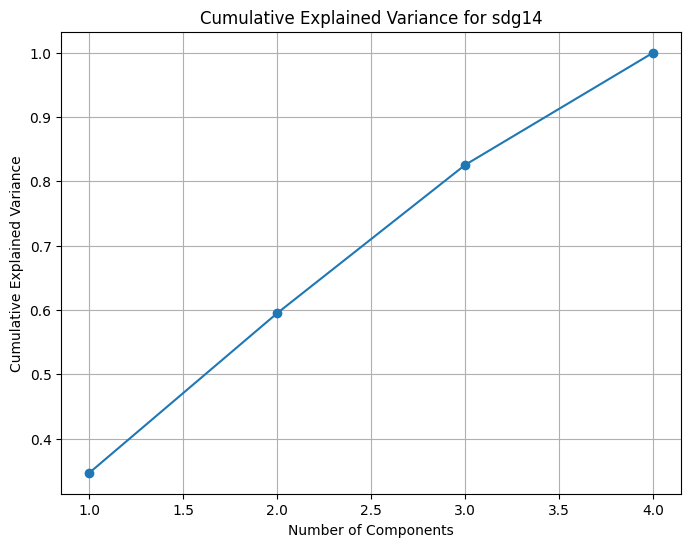

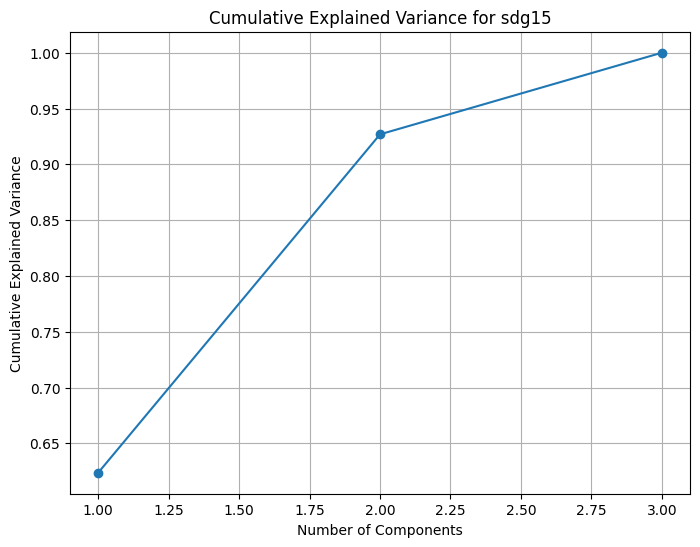

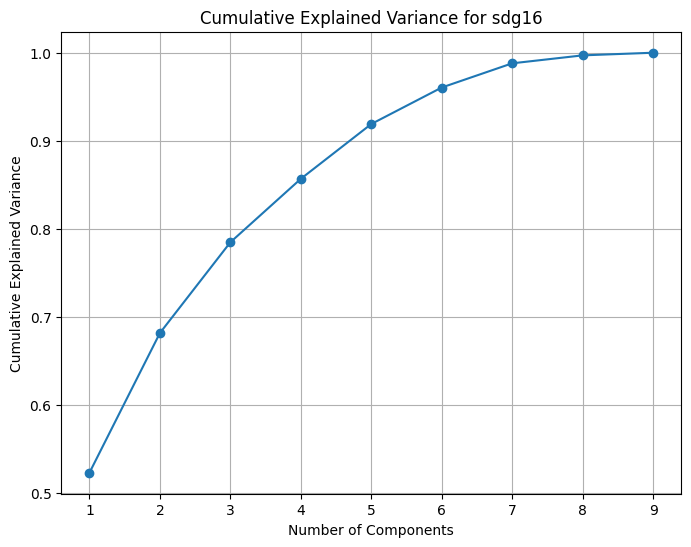

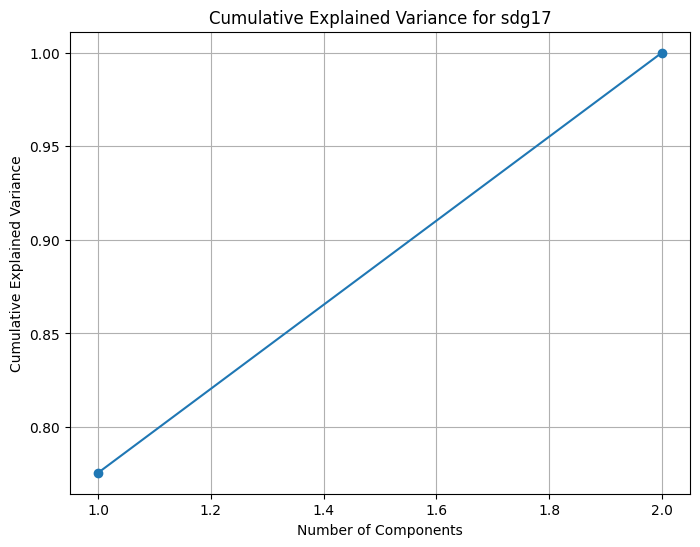

In [ ]:
# 4.3 Phương sai tích lũy cho PCA theo nhóm SDG
print("\n4.3 Vẽ biểu đồ phương sai tích lũy cho PCA theo nhóm SDG:")
for group, result in pca_results.items():
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(result['cumulative_var']) + 1), result['cumulative_var'], marker='o')
    plt.title(f"Cumulative Explained Variance for {group}")
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.grid(True)
    plt.savefig(f'pca_variance_{group}.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


4.4 Vẽ scatter plot cho T-SNE:


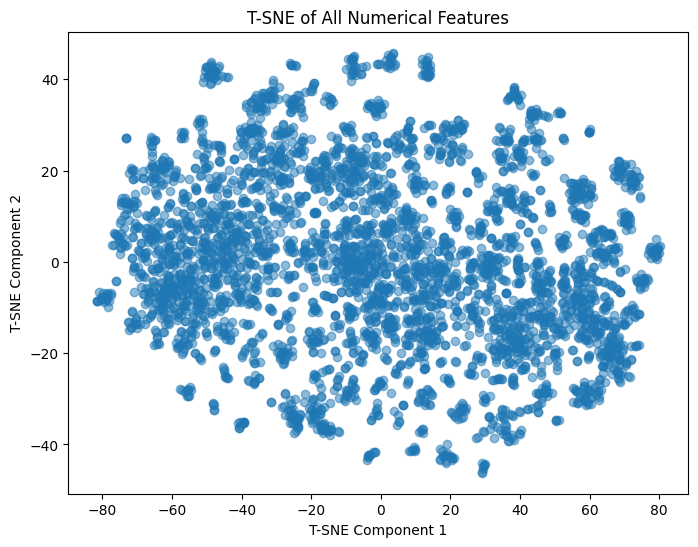

In [ ]:
# 4.4 T-SNE Scatter Plot
print("\n4.4 Vẽ scatter plot cho T-SNE:")
if 'df_tsne' not in locals() or df_tsne.shape[0] == 0:
    print("Lỗi: Dữ liệu T-SNE rỗng hoặc chưa được tạo, không thể vẽ scatter plot.")
else:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.5)
    plt.title("T-SNE of All Numerical Features")
    plt.xlabel("T-SNE Component 1")
    plt.ylabel("T-SNE Component 2")
    plt.savefig('tsne_all_features.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()